In [1]:
import pandas as pd

In [2]:
excel_workbook = '/Users/summerzhang/Desktop/MI/INF1340/UN_MigrantStockTotal_2015.xlsx'

# Table 1

In [3]:
# Cleaning for table 1: 
UN_1 = pd.read_excel(excel_workbook, sheet_name = "Table 1", header = 15, usecols = "A:W")
UN_1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1990,1995,2000,2005,2010,...,2000.1,2005.1,2010.1,2015.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2
0,1,WORLD,NaN,900,NaN,152563212,160801752,172703309,191269100,221714243,...,87884839,97866674,114613714,126115435,74815702,79064275,84818470,93402426,107100529,117584801
1,2,Developed regions,(b),901,NaN,82378628,92306854,103375363,117181109,132560325,...,50536796,57217777,64081077,67618619,42115231,47214055,52838567,59963332,68479248,72863336
2,3,Developing regions,(c),902,NaN,70184584,68494898,69327946,74087991,89153918,...,37348043,40648897,50532637,58496816,32700471,31850220,31979903,33439094,38621281,44721465
3,4,Least developed countries,(d),941,NaN,11075966,11711703,10077824,9809634,10018128,...,5361902,5383009,5462714,6463217,5236216,5573685,4721920,4432371,4560536,5493028
4,5,Less developed regions excluding least develop...,NaN,934,NaN,59105261,56778501,59244124,64272611,79130668,...,31986141,35265888,45069923,52033599,27464255,26276535,27257983,29006723,34060745,39228437


In [4]:
# rename columns for table 1:
UN_1 = UN_1.rename(columns = {
    "Unnamed: 0": "Sort order",
    "Unnamed: 1": "Country or area of destination",
    "Unnamed: 2": "Notes",
    "Unnamed: 3": "Country code",
    "Unnamed: 4": "Type of data (a)",
    1990: "b1990 ",
    1995: "b1995",
    2000: "b2000",
    2005: "b2005",
    2010: "b2010",
    2015: "b2015",
    "1990.1": "m1990",
    "1995.1": "m1995",
    "2000.1": "m2000",
    "2005.1": "m2005",
    "2010.1": "m2010",
    "2015.1": "m2015",
    "1990.2": "f1990",
    "1995.2": "f1995",
    "2000.2": "f2000",
    "2005.2": "f2005",
    "2010.2": "f2010",
    "2015.2": "f2015"
})

In [5]:
# We should seperate rows of countries with rows of regions and areas.
# This new formed table is the collection of all rows of regions and areas, further manipulations are needed.
UN_1_major_area_region = UN_1[UN_1['Type of data (a)'].isna()]
UN_1_major_area_region.head()

,Sort order,Country or area of destination,Notes,Country code,Type of data (a),b1990,b1995,b2000,b2005,b2010,...,m2000,m2005,m2010,m2015,f1990,f1995,f2000,f2005,f2010,f2015
0,1,WORLD,NaN,900,NaN,152563212,160801752,172703309,191269100,221714243,...,87884839,97866674,114613714,126115435,74815702,79064275,84818470,93402426,107100529,117584801
1,2,Developed regions,(b),901,NaN,82378628,92306854,103375363,117181109,132560325,...,50536796,57217777,64081077,67618619,42115231,47214055,52838567,59963332,68479248,72863336
2,3,Developing regions,(c),902,NaN,70184584,68494898,69327946,74087991,89153918,...,37348043,40648897,50532637,58496816,32700471,31850220,31979903,33439094,38621281,44721465
3,4,Least developed countries,(d),941,NaN,11075966,11711703,10077824,9809634,10018128,...,5361902,5383009,5462714,6463217,5236216,5573685,4721920,4432371,4560536,5493028
4,5,Less developed regions excluding least develop...,NaN,934,NaN,59105261,56778501,59244124,64272611,79130668,...,31986141,35265888,45069923,52033599,27464255,26276535,27257983,29006723,34060745,39228437


In [6]:
# separately select those rows into a new dataframe since data are grouped differently with others.
UN_1_world = UN_1_major_area_region.loc[0:6,:]

In [7]:
# Principle 1&2:
# Make this dataframe tidy and style the dataframe
UN_1_world = UN_1_world.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)"], 
               var_name = ["demographic"],
               value_name = "International migrant stock at mid-year")
UN_1_world = UN_1_world.assign(Gender = lambda x:x.demographic.str[0].astype(str), 
                   Year = lambda x:x.demographic.str[1:].astype(str)).drop("demographic",axis = 1)
UN_1_world = UN_1_world.replace(to_replace =["b","m","f"],value =["Both","Male","Female"])


In [8]:
UN_1_world

,Sort order,Country or area of destination,Notes,Country code,Type of data (a),International migrant stock at mid-year,Gender,Year
0,1,WORLD,NaN,900,NaN,152563212,Both,1990
1,2,Developed regions,(b),901,NaN,82378628,Both,1990
2,3,Developing regions,(c),902,NaN,70184584,Both,1990
3,4,Least developed countries,(d),941,NaN,11075966,Both,1990
4,5,Less developed regions excluding least develop...,NaN,934,NaN,59105261,Both,1990
...,...,...,...,...,...,...,...,...
121,3,Developing regions,(c),902,NaN,44721465,Female,2015
122,4,Least developed countries,(d),941,NaN,5493028,Female,2015
123,5,Less developed regions excluding least develop...,NaN,934,NaN,39228437,Female,2015
124,6,Sub-Saharan Africa,(e),947,NaN,8894500,Female,2015


In [9]:
# Access major area's country code from ANNEX worksheet
ANNEX_area_code = pd.read_excel(excel_workbook, sheet_name = "ANNEX", header = 14, usecols = "E").drop_duplicates()
ANNEX_area_code = [935,908,903,909,904,905]
# Group rows of Area into a new dataframe
UN_1_area = UN_1_major_area_region[UN_1_major_area_region["Country code"].isin(ANNEX_area_code)]

In [10]:
# Principle 1&2:
# Make this dataframe tidy and style the dataframe
UN_1_area = UN_1_area.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)"], 
               var_name = ["demographic"],
               value_name = "International migrant stock at mid-year")
UN_1_area = UN_1_area.assign(Gender = lambda x:x.demographic.str[0].astype(str), 
                   Year = lambda x:x.demographic.str[1:].astype(str)).drop("demographic",axis = 1)
UN_1_area = UN_1_area.replace(to_replace =["b","m","f"],value =["Both","Male","Female"])
UN_1_area = UN_1_area.rename(columns = {
    "Country or area of destination":"Major area"})

In [11]:
UN_1_area

,Sort order,Major area,Notes,Country code,Type of data (a),International migrant stock at mid-year,Gender,Year
0,7,Africa,NaN,903,NaN,15690623,Both,1990
1,71,Asia,NaN,935,NaN,48142261,Both,1990
2,127,Europe,NaN,908,NaN,49219200,Both,1990
3,180,Latin America and the Caribbean,NaN,904,NaN,7169728,Both,1990
4,232,Northern America,NaN,905,NaN,27610542,Both,1990
...,...,...,...,...,...,...,...,...
103,71,Asia,NaN,935,NaN,31530709,Female,2015
104,127,Europe,NaN,908,NaN,39873338,Female,2015
105,180,Latin America and the Caribbean,NaN,904,NaN,4650938,Female,2015
106,232,Northern America,NaN,905,NaN,27902348,Female,2015


In [12]:
# Group rows of Region into a new dataframe
UN_1_region = UN_1_major_area_region.loc[~UN_1_major_area_region["Country code"].isin(ANNEX_area_code)].loc[7:,:]

In [13]:
# Principle 1&2:
# Make this dataframe tidy and style the dataframe
UN_1_region = UN_1_region.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)"], 
               var_name = ["demographic"],
               value_name = "International migrant stock at mid-year")
UN_1_region = UN_1_region.assign(Gender = lambda x:x.demographic.str[0].astype(str), 
                   Year = lambda x:x.demographic.str[1:].astype(str)).drop("demographic",axis = 1)
UN_1_region=UN_1_region.replace(to_replace =["b","m","f"],value =["Both","Male","Female"])
UN_1_region = UN_1_region.rename(columns = {
    "Country or area of destination":"Region"})


In [14]:
UN_1_region

,Sort order,Region,Notes,Country code,Type of data (a),International migrant stock at mid-year,Gender,Year
0,8,Eastern Africa,NaN,910,NaN,5964031,Both,1990
1,29,Middle Africa,NaN,911,NaN,1460530,Both,1990
2,39,Northern Africa,NaN,912,NaN,2403200,Both,1990
3,47,Southern Africa,NaN,913,NaN,1392359,Both,1990
4,53,Western Africa,NaN,914,NaN,4470503,Both,1990
...,...,...,...,...,...,...,...,...
373,217,South America,NaN,931,NaN,2965406,Female,2015
374,239,Australia and New Zealand,NaN,927,NaN,3963032,Female,2015
375,242,Melanesia,NaN,928,NaN,47782,Female,2015
376,248,Micronesia,NaN,954,NaN,57159,Female,2015


In [15]:
# I choose to filter out country rows and join region and area information as 2 new columns.
# Filter out all country rows as the new UN_1 dataframe
UN_1 = UN_1[UN_1['Type of data (a)'].notna()] 

In [16]:
# Read ANNEX excel worksheet, select columns we want to conbine with UN_1
ANNEX = pd.read_excel(excel_workbook, sheet_name = "ANNEX", header = 14, usecols = "C,D,G")
# Left join two dataframes by their common column 'Sort order', add two new columns, Major area and Region
UN_1 = UN_1.join(ANNEX.set_index('Sort order'), on='Sort order')

In [17]:
# Principle 1&2:
# Try to convert joined data into tidy data
UN_1 = UN_1.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)","Major area","Region"], 
               var_name = ["demographic"],
               value_name = "International migrant stock at mid-year")
UN_1 = UN_1.assign(Gender = lambda x:x.demographic.str[0].astype(str), 
                   Year = lambda x:x.demographic.str[1:].astype(str)).drop("demographic",axis = 1)
# Styling the dataset
UN_1 = UN_1.replace(to_replace =["b","m","f"],value =["Both","Male","Female"])
# final tidy dataframe for countries
UN_1

,Sort order,Country or area of destination,Notes,Country code,Type of data (a),Major area,Region,International migrant stock at mid-year,Gender,Year
0,9,Burundi,NaN,108,B R,Africa,Eastern Africa,333110,Both,1990
1,10,Comoros,NaN,174,B,Africa,Eastern Africa,14079,Both,1990
2,11,Djibouti,NaN,262,B R,Africa,Eastern Africa,122221,Both,1990
3,12,Eritrea,NaN,232,I,Africa,Eastern Africa,11848,Both,1990
4,13,Ethiopia,NaN,231,B R,Africa,Eastern Africa,1155390,Both,1990
...,...,...,...,...,...,...,...,...,...,...
4171,261,Samoa,NaN,882,B,Oceania,Polynesia,2460,Female,2015
4172,262,Tokelau,NaN,772,B,Oceania,Polynesia,254,Female,2015
4173,263,Tonga,NaN,776,B,Oceania,Polynesia,2604,Female,2015
4174,264,Tuvalu,NaN,798,C,Oceania,Polynesia,63,Female,2015


# EDA-table1

In [18]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import seaborn as sns

In [19]:
# build bar chart to demonstrate total migrants in the world by sex in each year.
## select rows we want to include for 'WORLD'
world_migrant = UN_1_world.loc[UN_1_world["Country or area of destination"] == "WORLD"]

In [20]:
world_migrant

,Sort order,Country or area of destination,Notes,Country code,Type of data (a),International migrant stock at mid-year,Gender,Year
0,1,WORLD,NaN,900,NaN,152563212,Both,1990
7,1,WORLD,NaN,900,NaN,160801752,Both,1995
14,1,WORLD,NaN,900,NaN,172703309,Both,2000
21,1,WORLD,NaN,900,NaN,191269100,Both,2005
28,1,WORLD,NaN,900,NaN,221714243,Both,2010
35,1,WORLD,NaN,900,NaN,243700236,Both,2015
42,1,WORLD,NaN,900,NaN,77747510,Male,1990
49,1,WORLD,NaN,900,NaN,81737477,Male,1995
56,1,WORLD,NaN,900,NaN,87884839,Male,2000
63,1,WORLD,NaN,900,NaN,97866674,Male,2005


In [21]:
## select columns we would like to use for bar chart
world_migrant_gender = world_migrant[['International migrant stock at mid-year','Gender','Year']]

## 1. barplot of total number of international migrants by gender

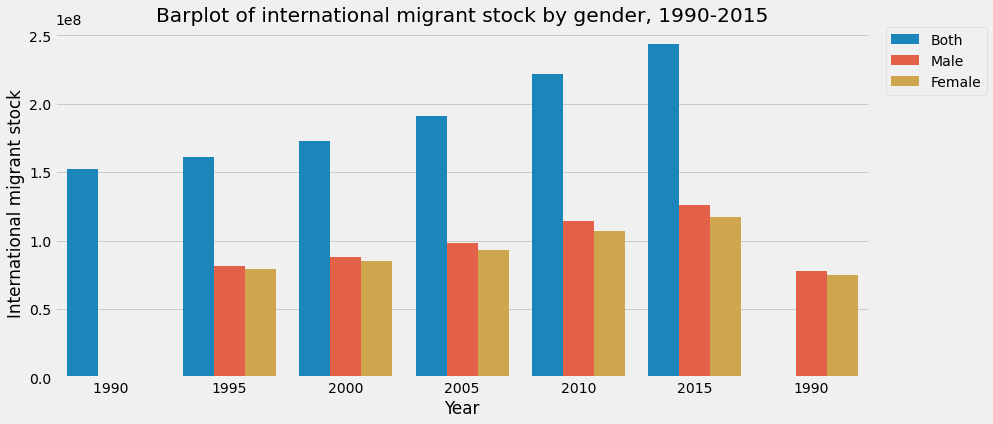

In [22]:
## draw the barplot use 'sns'
fig,ax = plots.subplots(figsize=(13,6))
perc = sns.barplot(x = "Year", y = "International migrant stock at mid-year", hue = "Gender", data = world_migrant_gender)
plots.title('Barplot of international migrant stock by gender, 1990-2015')
plots.legend(bbox_to_anchor = (1.02,1), loc='upper left', borderaxespad=0)
perc.set(ylabel='International migrant stock')
plots.show()

## 2. barplot of major area for international migrant

In [23]:
# build bartplot to demonstrate major areas of international migrants
## select rows we would like to include
area_migrant = UN_1_area.loc[UN_1_area["Gender"] == "Both"]
## select columns we will uss for this barplot
area_migrant = UN_1_area[['Major area','International migrant stock at mid-year','Year']]

In [24]:
## compare the international migrant stock in each major area in 1990 and 2015
area_migrant_1990 = area_migrant.loc[area_migrant["Year"] == "1990"]
area_migrant_2015 = area_migrant.loc[area_migrant["Year"] == "2015"]

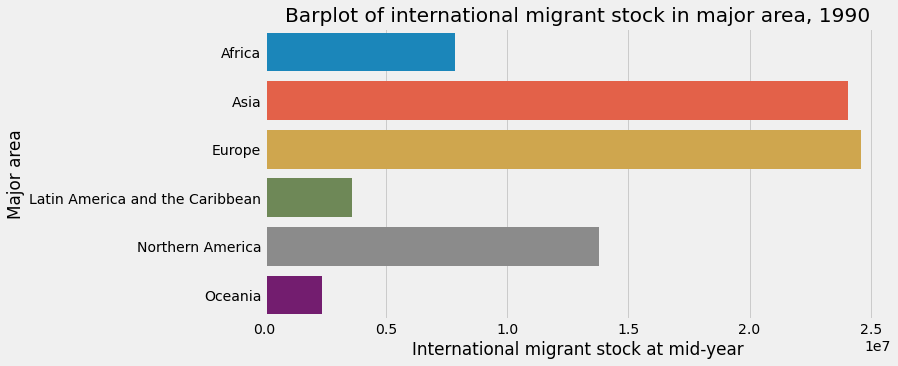

In [25]:
## draw the barplot use 'sns'fig,ax = plots.subplots(figsize=(10,5))
sns.barplot(x = "International migrant stock at mid-year", y = "Major area", ci = None, data = area_migrant_1990)
plots.title('Barplot of international migrant stock in major area, 1990')
plots.show()

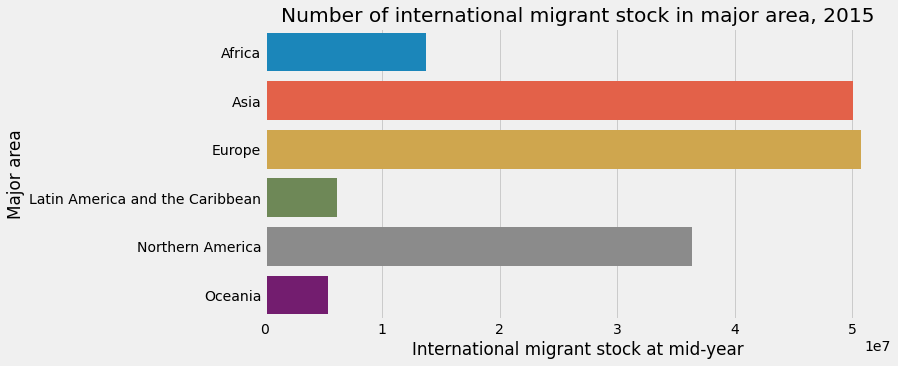

In [26]:
fig,ax = plots.subplots(figsize=(10,5))
sns.barplot(x = "International migrant stock at mid-year", y = "Major area", ci=None,data = area_migrant_2015)
plots.title('Number of international migrant stock in major area, 2015')
plots.show()

## 4. Number of international migrants by major area in 1990 and 2015

In [27]:
area_migrant_1990_2015 = area_migrant.loc[area_migrant["Year"].isin(['1990','2015'])]

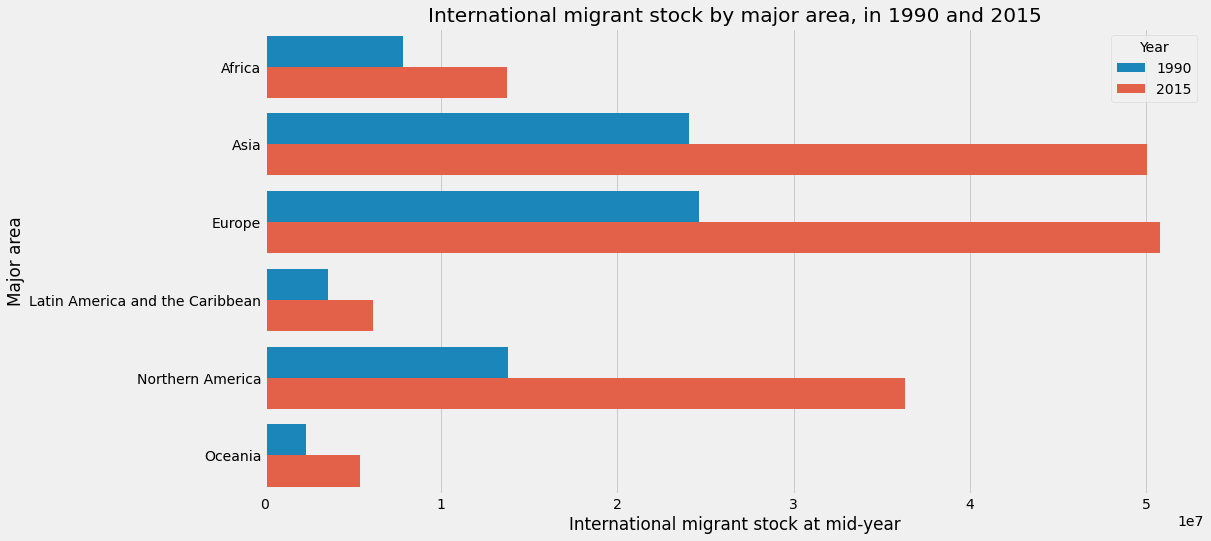

In [28]:
# within 25 years from 1990 to 2015, Asia added the most international mirants than any other major areas.
fig,ax = plots.subplots(figsize=(15,8))
sns.barplot(x = "International migrant stock at mid-year", y = "Major area", hue = "Year",hue_order = ['1990','2015'],ci=None,data = area_migrant_1990_2015)
plots.title('International migrant stock by major area, in 1990 and 2015')
plots.show()

## 5. Barplot of Top 10 countires with the most migrants in 2015

In [29]:
UN_1

,Sort order,Country or area of destination,Notes,Country code,Type of data (a),Major area,Region,International migrant stock at mid-year,Gender,Year
0,9,Burundi,NaN,108,B R,Africa,Eastern Africa,333110,Both,1990
1,10,Comoros,NaN,174,B,Africa,Eastern Africa,14079,Both,1990
2,11,Djibouti,NaN,262,B R,Africa,Eastern Africa,122221,Both,1990
3,12,Eritrea,NaN,232,I,Africa,Eastern Africa,11848,Both,1990
4,13,Ethiopia,NaN,231,B R,Africa,Eastern Africa,1155390,Both,1990
...,...,...,...,...,...,...,...,...,...,...
4171,261,Samoa,NaN,882,B,Oceania,Polynesia,2460,Female,2015
4172,262,Tokelau,NaN,772,B,Oceania,Polynesia,254,Female,2015
4173,263,Tonga,NaN,776,B,Oceania,Polynesia,2604,Female,2015
4174,264,Tuvalu,NaN,798,C,Oceania,Polynesia,63,Female,2015


In [30]:
## select rows
country_migrant = UN_1.loc[UN_1["Gender"] == "Both"]

In [31]:
## select columns
country_migrant = country_migrant[['Country or area of destination','International migrant stock at mid-year','Year']]

In [32]:
country_migrant['International migrant stock at mid-year'].dtypes

dtype('O')

In [33]:
# Replace all '..' into '0' for clarification
country_migrant = country_migrant.replace({'..':'0'})

In [34]:
country_migrant['International migrant stock at mid-year']=country_migrant['International migrant stock at mid-year'].astype(float).astype(int)

In [35]:
country_migrant['International migrant stock at mid-year'].dtypes

dtype('int64')

In [36]:
country_migrant

,Country or area of destination,International migrant stock at mid-year,Year
0,Burundi,333110,1990
1,Comoros,14079,1990
2,Djibouti,122221,1990
3,Eritrea,11848,1990
4,Ethiopia,1155390,1990
...,...,...,...
1387,Samoa,4929,2015
1388,Tokelau,487,2015
1389,Tonga,5731,2015
1390,Tuvalu,141,2015


In [37]:
country_migrant_2015 = country_migrant.loc[country_migrant["Year"] == "2015"]

In [38]:
top10_country_2015 = country_migrant_2015.nlargest(10,'International migrant stock at mid-year')

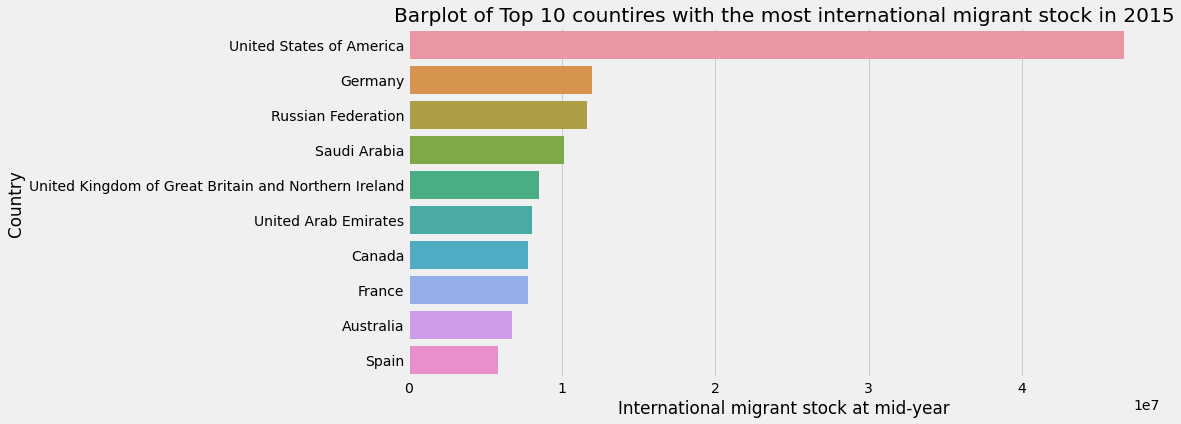

In [39]:
# top 10 countries hold the most numebr of international migrant stocks in 2015
fig,ax = plots.subplots(figsize=(12,6))
num = sns.barplot(x = "International migrant stock at mid-year", y = "Country or area of destination", data = top10_country_2015)
plots.title('Barplot of Top 10 countires with the most international migrant stock in 2015')
num.set(ylabel='Country')
plots.show()

In [40]:
country_migrant_2000 = country_migrant.loc[country_migrant["Year"] == "2000"]
top10_country_2000 = country_migrant_2000.nlargest(10,'International migrant stock at mid-year')

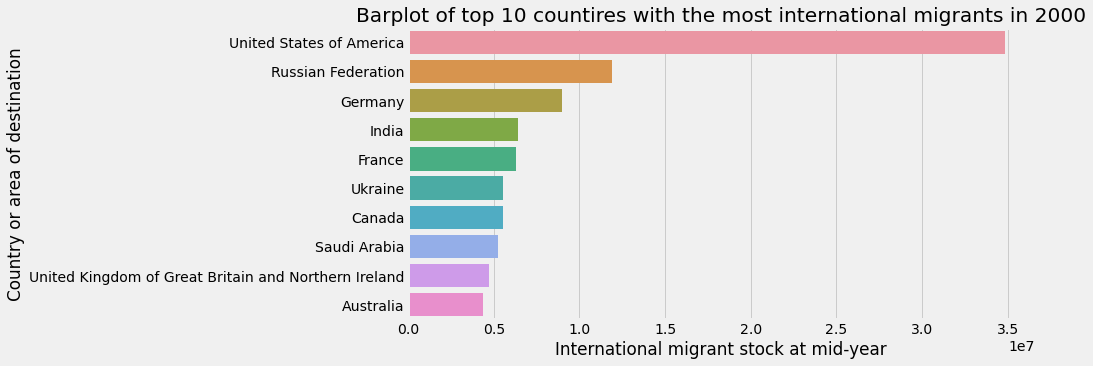

In [41]:
# top 10 countries hold the most numebr of international migrant stocks in 2000
fig,ax = plots.subplots(figsize=(10,5))
sns.barplot(x = "International migrant stock at mid-year", y = "Country or area of destination", data = top10_country_2000)
plots.title('Barplot of top 10 countires with the most international migrants in 2000')
plots.show()

## 2. developing and developed countries 

In [42]:
## select rows we want to include for developed and developing regions.
world_migrant_develop = UN_1_world.loc[UN_1_world["Country or area of destination"].isin(['Developed regions','Developing regions'])]
world_migrant_develop = world_migrant_develop.loc[world_migrant_develop["Gender"] == "Both"]

In [43]:
world_migrant_develop

,Sort order,Country or area of destination,Notes,Country code,Type of data (a),International migrant stock at mid-year,Gender,Year
1,2,Developed regions,(b),901,NaN,82378628,Both,1990
2,3,Developing regions,(c),902,NaN,70184584,Both,1990
8,2,Developed regions,(b),901,NaN,92306854,Both,1995
9,3,Developing regions,(c),902,NaN,68494898,Both,1995
15,2,Developed regions,(b),901,NaN,103375363,Both,2000
16,3,Developing regions,(c),902,NaN,69327946,Both,2000
22,2,Developed regions,(b),901,NaN,117181109,Both,2005
23,3,Developing regions,(c),902,NaN,74087991,Both,2005
29,2,Developed regions,(b),901,NaN,132560325,Both,2010
30,3,Developing regions,(c),902,NaN,89153918,Both,2010


In [44]:
## select rows we want to include
world_migrant_develop = UN_1_world.loc[UN_1_world["Country or area of destination"].isin(['Developed regions','Developing regions'])]

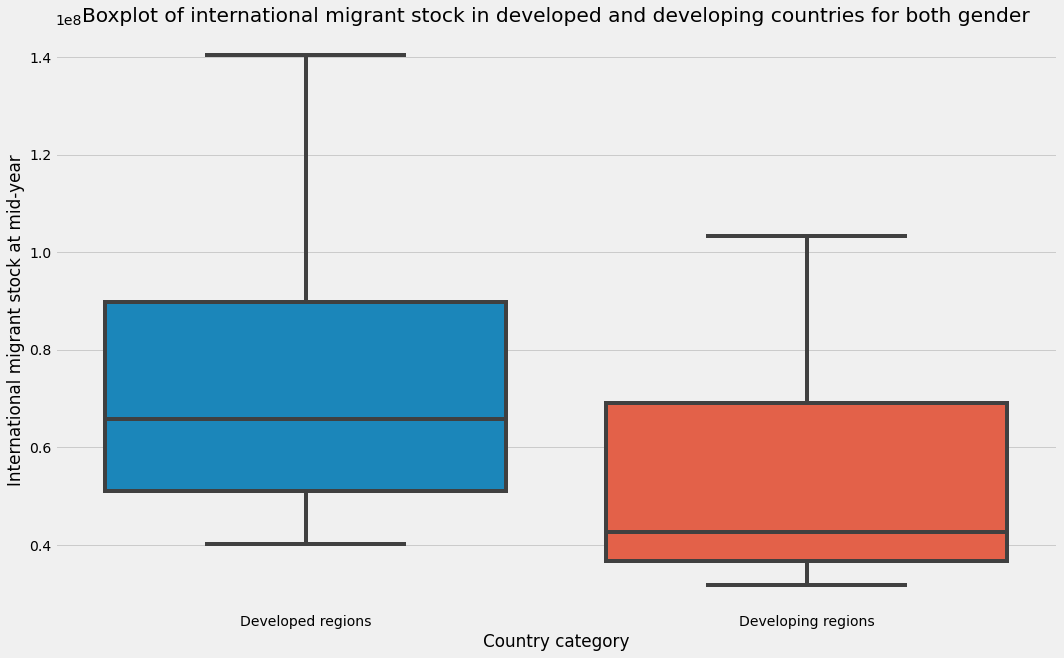

In [45]:
## create boxplot
fig,ax = plots.subplots(figsize=(16,10))
perc = sns.boxplot(x = "Country or area of destination", y = "International migrant stock at mid-year", data = world_migrant_develop)
plots.title('Boxplot of international migrant stock in developed and developing countries for both gender')
perc.set(xlabel='Country category')
plots.show()

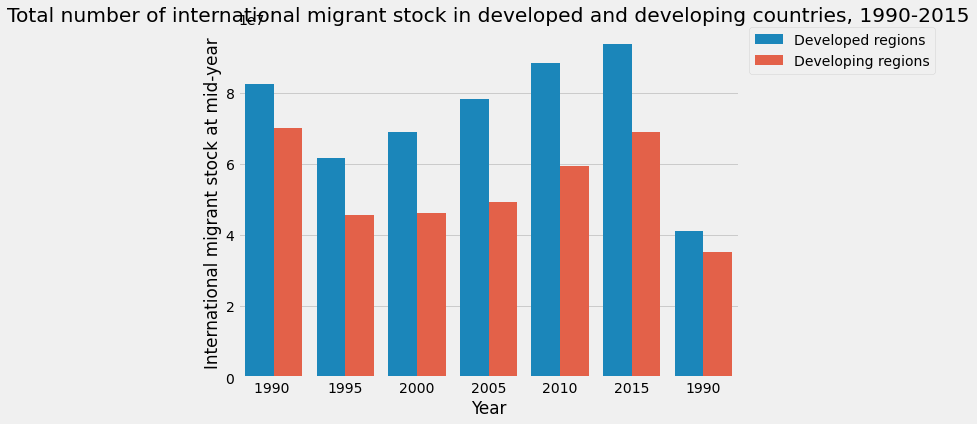

In [46]:
fig,ax = plots.subplots(figsize=(8,6))
sns.barplot(x = "Year", y = "International migrant stock at mid-year", hue = "Country or area of destination", ci= None,data = world_migrant_develop)
plots.title('Total number of international migrant stock in developed and developing countries, 1990-2015')
plots.legend(bbox_to_anchor = (1.02,1), loc='upper left', borderaxespad=0)
plots.show()

# Table 2

In [47]:
# Read the worksheet called Table 2: 
UN_2 = pd.read_excel(excel_workbook, sheet_name = "Table 2", header = 15, usecols = "A:V")
# rename columns for table 2:
UN_2 = UN_2.rename(columns = {
    "Unnamed: 0": "Sort order",
    "Unnamed: 1": "Country or area of destination",
    "Unnamed: 2": "Notes",
    "Unnamed: 3": "Country code",
    1990: "b1990 ",
    1995: "b1995",
    2000: "b2000",
    2005: "b2005",
    2010: "b2010",
    2015: "b2015",
    "1990.1": "m1990",
    "1995.1": "m1995",
    "2000.1": "m2000",
    "2005.1": "m2005",
    "2010.1": "m2010",
    "2015.1": "m2015",
    "1990.2": "f1990",
    "1995.2": "f1995",
    "2000.2": "f2000",
    "2005.2": "f2005",
    "2010.2": "f2010",
    "2015.2": "f2015"
})

In [48]:
# Do the same manipulation as I did for table 1 to separate counties, areas and regions into different tables
# This new formed table is the collection of all rows of regions and areas, further manipulations are needed.
ANNEX_country_code = pd.read_excel(excel_workbook, sheet_name = "ANNEX", header = 14, usecols = "A")
ANNEX_country_code = ANNEX_country_code['Country code'].tolist()
UN_2_major_area_region = UN_2[~UN_2['Country code'].isin(ANNEX_country_code)]

In [49]:
# separately select those rows into a new dataframe since data are grouped differently from others.
UN_2_world = UN_2_major_area_region.loc[0:6,:]
# Principle 1&2:
# Make this dataframe tidy and style the dataframe
UN_2_world = UN_2_world.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code"], 
               var_name = ["demographic"],
               value_name = "Total population at mid-year")
UN_2_world = UN_2_world.assign(Gender = lambda x:x.demographic.str[0].astype(str), 
                   Year = lambda x:x.demographic.str[1:].astype(str)).drop("demographic",axis = 1)
UN_2_world = UN_2_world.replace(to_replace =["b","m","f"],value =["Both","Male","Female"])

In [50]:
# Group rows of Area into a new dataframe
UN_2_area = UN_2_major_area_region[UN_2_major_area_region["Country code"].isin(ANNEX_area_code)]
# Make this dataframe tidy
UN_2_area = UN_2_area.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code"], 
               var_name = ["demographic"],
               value_name = "Total population at mid-year")
UN_2_area = UN_2_area.assign(Gender = lambda x:x.demographic.str[0].astype(str), 
                   Year = lambda x:x.demographic.str[1:].astype(str)).drop("demographic",axis = 1)
UN_2_area = UN_2_area.replace(to_replace =["b","m","f"],value =["Both","Male","Female"])
UN_2_area = UN_2_area.rename(columns = {
    "Country or area of destination":"Major area"})

In [51]:
UN_2_area

,Sort order,Major area,Notes,Country code,Total population at mid-year,Gender,Year
0,7,Africa,NaN,903,631614.304,Both,1990
1,71,Asia,NaN,935,3202474.692,Both,1990
2,127,Europe,NaN,908,721086.311,Both,1990
3,180,Latin America and the Caribbean,NaN,904,446888.767,Both,1990
4,232,Northern America,NaN,905,280633.063,Both,1990
...,...,...,...,...,...,...,...
103,71,Asia,NaN,935,2146310.075,Female,2015
104,127,Europe,NaN,908,382275.191,Female,2015
105,180,Latin America and the Caribbean,NaN,904,320877.844,Female,2015
106,232,Northern America,NaN,905,180455.403,Female,2015


In [52]:
# Group rows of Region into a new dataframe
UN_2_region = UN_2_major_area_region.loc[~UN_2_major_area_region["Country code"].isin(ANNEX_area_code)].loc[7:,:]
# Make this dataframe tidy
UN_2_region = UN_2_region.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code"], 
               var_name = ["demographic"],
               value_name = "Total population at mid-year")
UN_2_region = UN_2_region.assign(Gender = lambda x:x.demographic.str[0].astype(str), 
                   Year = lambda x:x.demographic.str[1:].astype(str)).drop("demographic",axis = 1)
UN_2_region=UN_2_region.replace(to_replace =["b","m","f"],value =["Both","Male","Female"])
UN_2_region = UN_2_region.rename(columns = {
    "Country or area of destination":"Region"})

In [53]:
# Filter out all country rows as the new UN_2 dataframe
ANNEX_country_code = pd.read_excel(excel_workbook, sheet_name = "ANNEX", header = 14, usecols = "A")
ANNEX_country_code = ANNEX_country_code['Country code'].tolist()
UN_2 = UN_2[UN_2['Country code'].isin(ANNEX_country_code)]
# Left join two dataframes by their common column 'Sort order'
UN_2 = UN_2.join(ANNEX.set_index('Sort order'), on='Sort order')
# Principle 1&2:
# Try to convert joined data into tidy data
UN_2 = UN_2.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Major area","Region"], 
               var_name = ["demographic"],
               value_name = "Total population at mid-year")
UN_2 = UN_2.assign(Gender = lambda x:x.demographic.str[0].astype(str), 
                   Year = lambda x:x.demographic.str[1:].astype(str)).drop("demographic",axis = 1)
# Styling the dataset
UN_2 = UN_2.replace(to_replace =["b","m","f"],value =["Both","Male","Female"])

# EDA-table2

In [54]:
UN_2_world

,Sort order,Country or area of destination,Notes,Country code,Total population at mid-year,Gender,Year
0,1,WORLD,NaN,900,5309667.699,Both,1990
1,2,Developed regions,(b),901,1144463.062,Both,1990
2,3,Developing regions,(c),902,4165204.637,Both,1990
3,4,Least developed countries,(d),941,510057.629,Both,1990
4,5,Less developed regions excluding least develop...,NaN,934,3655147.008,Both,1990
...,...,...,...,...,...,...,...
121,3,Developing regions,(c),902,3000212.408,Female,2015
122,4,Least developed countries,(d),941,478126.625,Female,2015
123,5,Less developed regions excluding least develop...,NaN,934,2522085.783,Female,2015
124,6,Sub-Saharan Africa,(e),947,481234.301,Female,2015


In [55]:
# build bar chart to demonstrate total population in the world by sex in each year.
## select rows we want to include for 'WORLD'
world_population = UN_2_world.loc[UN_2_world["Country or area of destination"] == "WORLD"]

In [56]:
world_population

,Sort order,Country or area of destination,Notes,Country code,Total population at mid-year,Gender,Year
0,1,WORLD,NaN,900,5309667.699,Both,1990
7,1,WORLD,NaN,900,5735123.084,Both,1995
14,1,WORLD,NaN,900,6126622.121,Both,2000
21,1,WORLD,NaN,900,6519635.850,Both,2005
28,1,WORLD,NaN,900,6929725.043,Both,2010
35,1,WORLD,NaN,900,7349472.099,Both,2015
42,1,WORLD,NaN,900,2670423.701,Male,1990
49,1,WORLD,NaN,900,2886635.893,Male,1995
56,1,WORLD,NaN,900,3084537.662,Male,2000
63,1,WORLD,NaN,900,3285082.249,Male,2005


In [57]:
## select columns we would like to use for bar chart
world_population_gender = world_population[['Total population at mid-year','Gender','Year']]

In [58]:
world_population_gender

,Total population at mid-year,Gender,Year
0,5309667.699,Both,1990
7,5735123.084,Both,1995
14,6126622.121,Both,2000
21,6519635.850,Both,2005
28,6929725.043,Both,2010
35,7349472.099,Both,2015
42,2670423.701,Male,1990
49,2886635.893,Male,1995
56,3084537.662,Male,2000
63,3285082.249,Male,2005


## 1. Barplot of total number of population in the world by gender

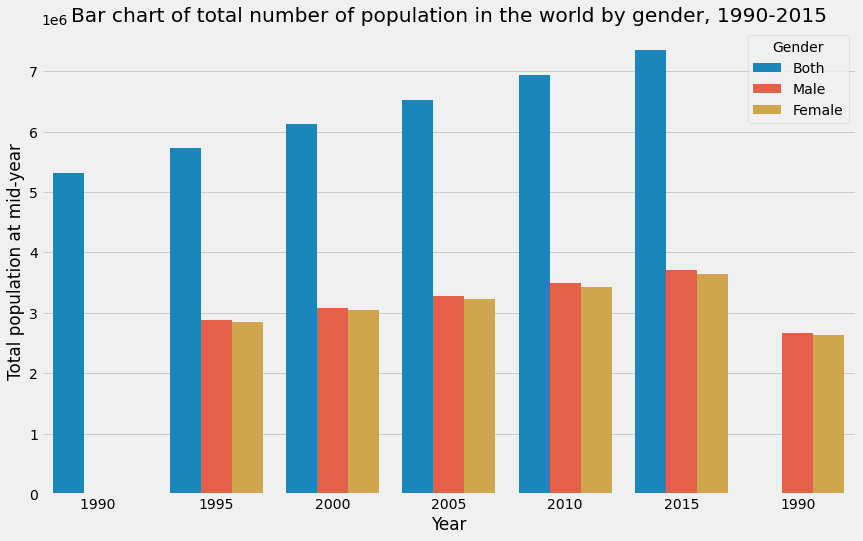

In [59]:
fig,ax = plots.subplots(figsize=(13,8))
sns.barplot(x = "Year", y = "Total population at mid-year", hue = "Gender", data = world_population_gender)
plots.title('Bar chart of total number of population in the world by gender, 1990-2015')
plots.show()

In [60]:
## select columns
world_area = UN_2_area[['Total population at mid-year','Major area','Year']]

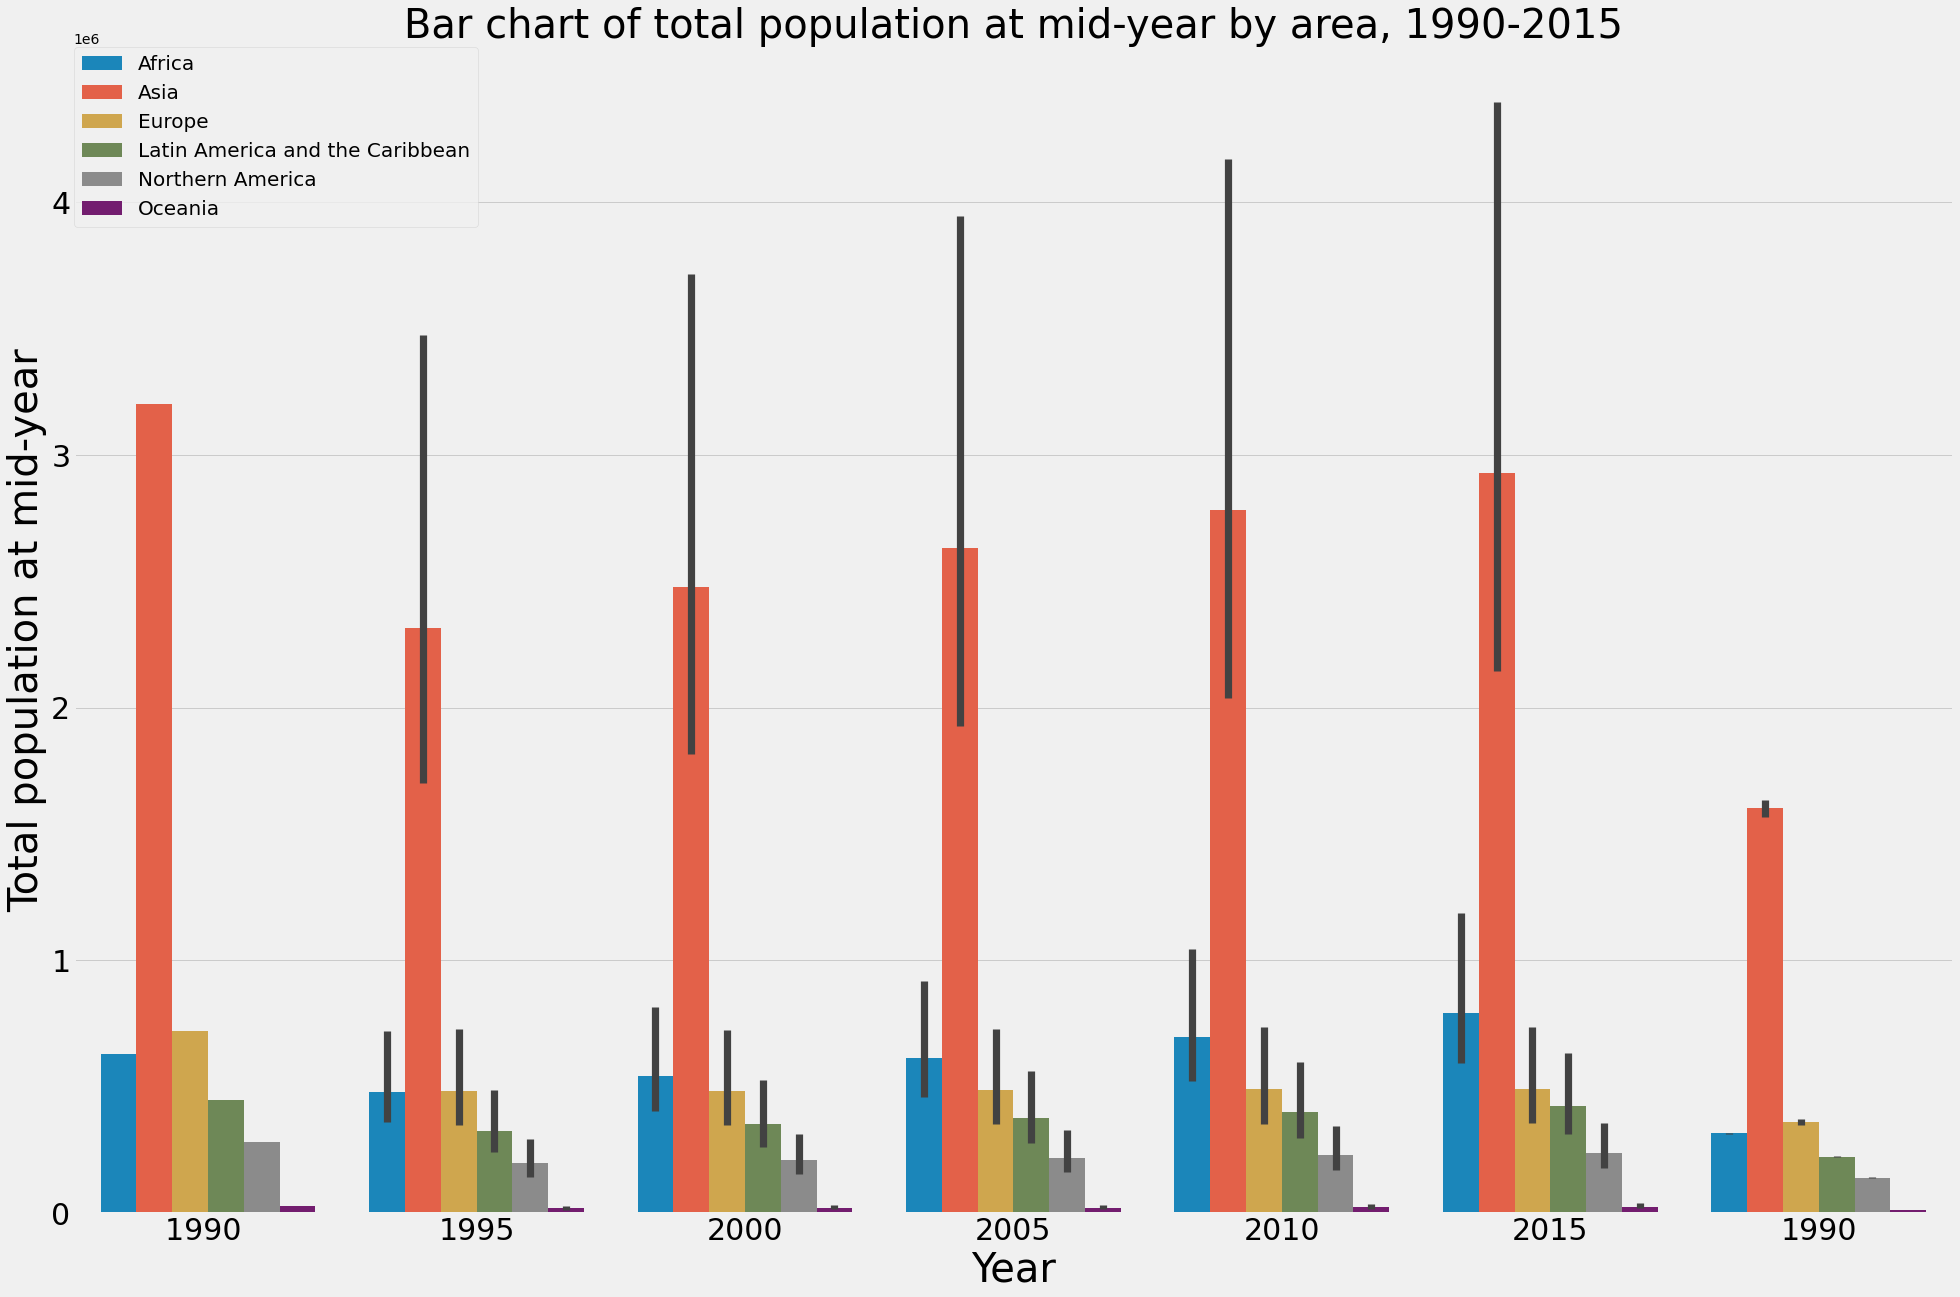

In [62]:
## plot the barplot of world population by each major area
fig,ax = plots.subplots(figsize=(30,20))
bar = sns.barplot(x = "Year", y = "Total population at mid-year", hue = "Major area", data = world_area)
plots.title('Bar chart of total population at mid-year by area, 1990-2015', fontsize=40)
plots.legend(loc='upper left', borderaxespad=0, fontsize = 20)
plots.xlabel('Year', fontsize=40)
plots.ylabel('Total population at mid-year', fontsize=40)
plots.tick_params(axis='both', which='major', labelsize=30)
plots.show()

# Table3

In [63]:
# Read the worksheet called Table 3: 
UN_3 = pd.read_excel(excel_workbook, sheet_name = "Table 3", header = 15, usecols = "A:W")
UN_3 = UN_3.rename(columns = {
    "Unnamed: 0": "Sort order",
    "Unnamed: 1": "Country or area of destination",
    "Unnamed: 2": "Notes",
    "Unnamed: 3": "Country code",
    "Unnamed: 4": "Type of data (a)",
    1990: "b1990 ",
    1995: "b1995",
    2000: "b2000",
    2005: "b2005",
    2010: "b2010",
    2015: "b2015",
    "1990.1": "m1990",
    "1995.1": "m1995",
    "2000.1": "m2000",
    "2005.1": "m2005",
    "2010.1": "m2010",
    "2015.1": "m2015",
    "1990.2": "f1990",
    "1995.2": "f1995",
    "2000.2": "f2000",
    "2005.2": "f2005",
    "2010.2": "f2010",
    "2015.2": "f2015"
})
# This new formed table is the collection of all rows of regions and areas, further manipulations are needed.
UN_3_major_area_region = UN_3[UN_3['Type of data (a)'].isna()]
UN_3_major_area_region.head()

,Sort order,Country or area of destination,Notes,Country code,Type of data (a),b1990,b1995,b2000,b2005,b2010,...,m2000,m2005,m2010,m2015,f1990,f1995,f2000,f2005,f2010,f2015
0,1,WORLD,NaN,900,NaN,2.87331,2.803806,2.818899,2.933739,3.199467,...,2.849206,2.979124,3.280341,3.4019,2.83474,2.775658,2.788169,2.887645,3.117222,3.228342
1,2,Developed regions,(b),901,NaN,7.198015,7.891085,8.695688,9.693045,10.747765,...,8.743236,9.73154,10.680972,11.097807,7.147777,7.84948,8.650694,9.656595,10.811029,11.348476
2,3,Developing regions,(c),902,NaN,1.685021,1.500317,1.404022,1.395066,1.565106,...,1.490031,1.507122,1.746117,1.888268,1.595116,1.417459,1.315351,1.279428,1.378176,1.49061
3,4,Least developed countries,(d),941,NaN,2.171513,2.001353,1.516863,1.303078,1.182422,...,1.617552,1.432574,1.293264,1.35773,2.045276,1.901226,1.418405,1.175548,1.073428,1.148865
4,5,Less developed regions excluding least develop...,NaN,934,NaN,1.617042,1.426534,1.386338,1.410133,1.631865,...,1.470597,1.519189,1.823509,1.984593,1.530877,1.344872,1.299002,1.296941,1.432634,1.555397


In [64]:
# separately select those rows into a new dataframe since data are grouped differently with others.
UN_3_world = UN_3_major_area_region.loc[0:6,:]
# Principle 1&2:
# Make this dataframe tidy and style the dataframe
UN_3_world = UN_3_world.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)"], 
               var_name = ["demographic"],
               value_name = "International migrant stock as a percentage of the total population")
UN_3_world = UN_3_world.assign(Gender = lambda x:x.demographic.str[0].astype(str), 
                   Year = lambda x:x.demographic.str[1:].astype(str)).drop("demographic",axis = 1)
UN_3_world = UN_3_world.replace(to_replace =["b","m","f"],value =["Both","Male","Female"])
# Set sort order as index
UN_3_world = UN_3_world.reset_index(drop=True).set_index("Sort order")
UN_3_world

,Country or area of destination,Notes,Country code,Type of data (a),International migrant stock as a percentage of the total population,Gender,Year
Sort order,,,,,,,
1,WORLD,NaN,900,NaN,2.873310,Both,1990
2,Developed regions,(b),901,NaN,7.198015,Both,1990
3,Developing regions,(c),902,NaN,1.685021,Both,1990
4,Least developed countries,(d),941,NaN,2.171513,Both,1990
5,Less developed regions excluding least develop...,NaN,934,NaN,1.617042,Both,1990
...,...,...,...,...,...,...,...
3,Developing regions,(c),902,NaN,1.490610,Female,2015
4,Least developed countries,(d),941,NaN,1.148865,Female,2015
5,Less developed regions excluding least develop...,NaN,934,NaN,1.555397,Female,2015


In [65]:
# Group rows of Area into a new dataframe
UN_3_area = UN_3_major_area_region[UN_3_major_area_region["Country code"].isin(ANNEX_area_code)]
# Make this dataframe tidy
UN_3_area = UN_3_area.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)"], 
               var_name = ["demographic"],
               value_name = "International migrant stock as a percentage of the total population")
UN_3_area = UN_3_area.assign(Gender = lambda x:x.demographic.str[0].astype(str), 
                   Year = lambda x:x.demographic.str[1:].astype(str)).drop("demographic",axis = 1)
UN_3_area = UN_3_area.replace(to_replace =["b","m","f"],value =["Both","Male","Female"])
UN_3_area = UN_3_area.rename(columns = {
    "Country or area of destination":"Major area"})

In [66]:
UN_3_area

,Sort order,Major area,Notes,Country code,Type of data (a),International migrant stock as a percentage of the total population,Gender,Year
0,7,Africa,NaN,903,NaN,2.484210,Both,1990
1,71,Asia,NaN,935,NaN,1.503283,Both,1990
2,127,Europe,NaN,908,NaN,6.825702,Both,1990
3,180,Latin America and the Caribbean,NaN,904,NaN,1.604365,Both,1990
4,232,Northern America,NaN,905,NaN,9.838663,Both,1990
...,...,...,...,...,...,...,...,...
103,71,Asia,NaN,935,NaN,1.469066,Female,2015
104,127,Europe,NaN,908,NaN,10.430532,Female,2015
105,180,Latin America and the Caribbean,NaN,904,NaN,1.449442,Female,2015
106,232,Northern America,NaN,905,NaN,15.462185,Female,2015


In [67]:
# Group rows of Region into a new dataframe
UN_3_region = UN_3_major_area_region.loc[~UN_1_major_area_region["Country code"].isin(ANNEX_area_code)].loc[7:,:]
# Make this dataframe tidy
UN_3_region = UN_3_region.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)"], 
               var_name = ["demographic"],
               value_name = "International migrant stock as a percentage of the total population")
UN_3_region = UN_3_region.assign(Gender = lambda x:x.demographic.str[0].astype(str), 
                   Year = lambda x:x.demographic.str[1:].astype(str)).drop("demographic",axis = 1)
UN_3_region=UN_3_region.replace(to_replace =["b","m","f"],value =["Both","Male","Female"])
UN_3_region = UN_3_region.rename(columns = {
    "Country or area of destination":"Region"})

In [68]:
# Filter out all country rows as the new UN_3 dataframe
UN_3 = UN_3[UN_3['Type of data (a)'].notna()] 
# Left join two dataframes by their common column 'Sort order'
UN_3 = UN_3.join(ANNEX.set_index('Sort order'), on='Sort order')
# Principle 1&2
UN_3 = UN_3.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)","Major area","Region"], 
               var_name = ["demographic"],
               value_name = "International migrant stock as a percentage of the total population")
UN_3 = UN_3.assign(Gender = lambda x:x.demographic.str[0].astype(str), 
                   Year = lambda x:x.demographic.str[1:].astype(str)).drop("demographic",axis = 1)
# Styling the dataset
UN_3 = UN_3.replace(to_replace =["b","m","f"],value =["Both","Male","Female"])

# EDA-table3

## 1. line chart for percentage of international migrant by major area

In [69]:
## select rows we want to include for migrant percentage
world_migrant_perc = UN_3_area.loc[UN_3_area["Gender"] == "Both"]

In [70]:
## select columns we want to include for migrant percentage
world_migrant_perc = world_migrant_perc[['International migrant stock as a percentage of the total population',
                                         'Major area','Year']]

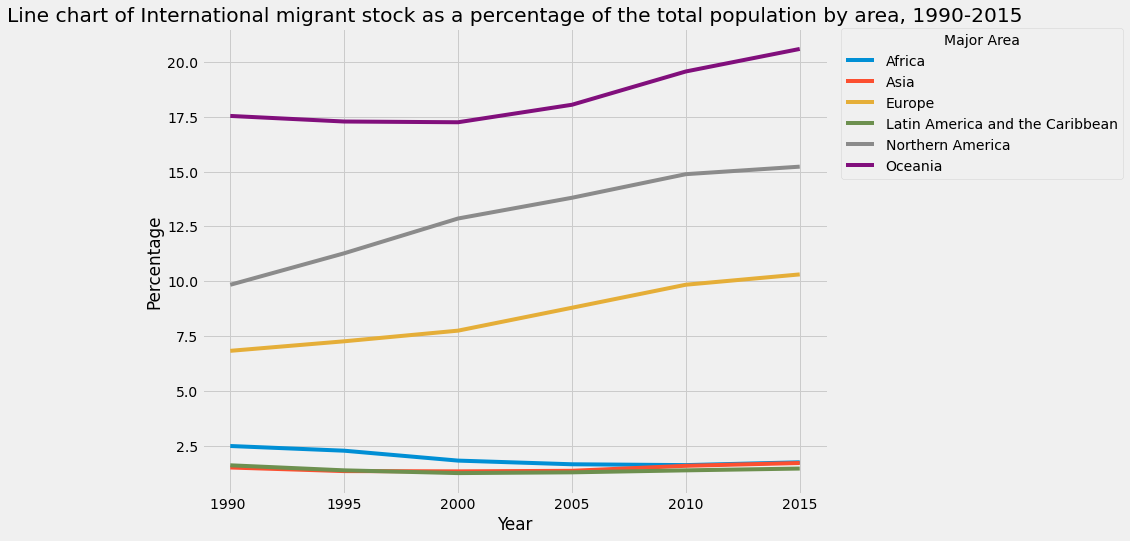

In [72]:
# line chart of migrants as a share of total populations by major area, 1990 to 2015
fig,ax = plots.subplots(figsize=(10,8))
perc = sns.lineplot(data = world_migrant_perc, x = 'Year', y = 'International migrant stock as a percentage of the total population', hue = 'Major area')
perc.set(xlabel='Year', ylabel='Percentage')
plots.title('Line chart of International migrant stock as a percentage of the total population by area, 1990-2015')
plots.legend(bbox_to_anchor = (1.02,1), loc='upper left', borderaxespad=0, title = 'Major Area')

## 2. Top 10 countries with the largest percentage of international migrant

In [76]:
## select rows of Both gender
country_migrant_perc = UN_3.loc[UN_3["Gender"] == "Both"]

In [78]:
# select columns
country_migrant_perc = country_migrant_perc[['Country or area of destination','International migrant stock as a percentage of the total population','Year']]

In [79]:
country_migrant_perc['International migrant stock as a percentage of the total population'].dtypes

dtype('O')

In [80]:
# Replace all '..' into '0' for clarification
country_migrant_perc = country_migrant_perc.replace({'..':'0'})

In [81]:
country_migrant_perc['International migrant stock as a percentage of the total population']=country_migrant_perc['International migrant stock as a percentage of the total population'].astype(float).astype(int)

In [82]:
# select columns with observation about 2015
country_migrant_perc_2015 = country_migrant_perc.loc[country_migrant_perc["Year"] == "2015"]

In [83]:
# compute top 10 counties with the largest share of international migrant stock
top10_country_perc_2015 = country_migrant_perc_2015.nlargest(10,'International migrant stock as a percentage of the total population')

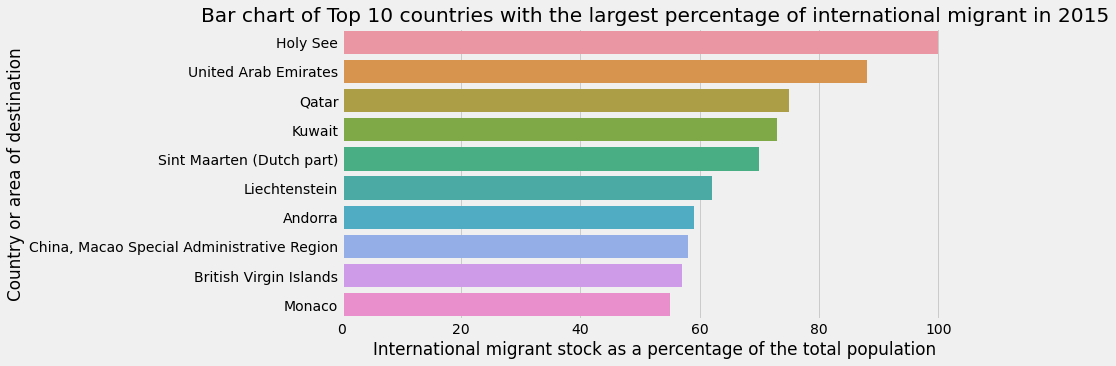

In [100]:
# bar plot for top 10 countries hold the most numebr of international migrant stocks in 2015
fig,ax = plots.subplots(figsize=(10,5))
sns.barplot(x = "International migrant stock as a percentage of the total population", y = "Country or area of destination", data = top10_country_perc_2015)
plots.title('Bar chart of Top 10 countries with the largest percentage of international migrant in 2015')
plots.show()

In [85]:
## select columns with observation about 2015
country_migrant_perc_2000 = country_migrant_perc.loc[country_migrant["Year"] == "2000"]
top10_country_perc_2000 = country_migrant_perc_2000.nlargest(10,'International migrant stock as a percentage of the total population')

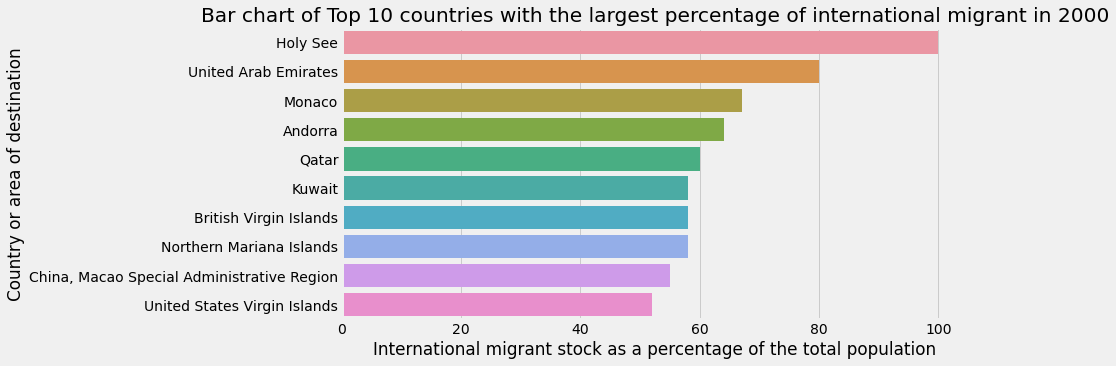

In [101]:
# top 10 countries hold the most numebr of international migrant stocks in 2000
fig,ax = plots.subplots(figsize=(10,5))
sns.barplot(x = "International migrant stock as a percentage of the total population", y = "Country or area of destination", data = top10_country_perc_2000)
plots.title('Bar chart of Top 10 countries with the largest percentage of international migrant in 2000')
plots.show()

# Table4

In [102]:
# Read the worksheet called Table 4: 
UN_4 = pd.read_excel(excel_workbook, sheet_name = "Table 4", header = 15, usecols = "A:K")

In [103]:
# rename columns for table 4:
UN_4 = UN_4.rename(columns = {
    "Unnamed: 0": "Sort order",
    "Unnamed: 1": "Country or area of destination",
    "Unnamed: 2": "Notes",
    "Unnamed: 3": "Country code",
    "Unnamed: 4": "Type of data (a)",
    1990: "1990 ",
    1995: "1995",
    2000: "2000",
    2005: "2005",
    2010: "2010",
    2015: "2015",
})
# This new formed table is the collection of all rows of regions and areas, further manipulations are needed.
UN_4_major_area_region = UN_4[UN_4['Type of data (a)'].isna()]
# separately select those rows into a new dataframe since data are grouped differently with others.
UN_4_world = UN_4_major_area_region.loc[0:6,:]
# Principle 1:
# Make this dataframe tidy
UN_4_world = UN_4_world.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)"], 
               var_name = ["Year"],
               value_name = "Female migrants as a percentage of the international migrant stock")

In [104]:
UN_4_world

,Sort order,Country or area of destination,Notes,Country code,Type of data (a),Year,Female migrants as a percentage of the international migrant stock
0,1,WORLD,NaN,900,NaN,1990,49.03915
1,2,Developed regions,(b),901,NaN,1990,51.123977
2,3,Developing regions,(c),902,NaN,1990,46.592099
3,4,Least developed countries,(d),941,NaN,1990,47.261155
4,5,Less developed regions excluding least develop...,NaN,934,NaN,1990,46.466684
5,6,Sub-Saharan Africa,(e),947,NaN,1990,47.276121
6,7,Africa,NaN,903,NaN,1990,47.232408
7,1,WORLD,NaN,900,NaN,1995,49.16879
8,2,Developed regions,(b),901,NaN,1995,51.149024
9,3,Developing regions,(c),902,NaN,1995,46.500135


In [105]:
# Group rows of Area into a new dataframe
UN_4_area = UN_4_major_area_region[UN_4_major_area_region["Country code"].isin(ANNEX_area_code)]
# Make this dataframe tidy
UN_4_area = UN_4_area.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)"], 
               var_name = ["Year"],
               value_name = "Female migrants as a percentage of the international migrant stock")
UN_4_area = UN_4_area.rename(columns = {
    "Country or area of destination":"Major area"})

In [106]:
UN_4_area

,Sort order,Major area,Notes,Country code,Type of data (a),Year,Female migrants as a percentage of the international migrant stock
0,7,Africa,NaN,903,NaN,1990,47.232408
1,71,Asia,NaN,935,NaN,1990,45.96873
2,127,Europe,NaN,908,NaN,1990,51.346887
3,180,Latin America and the Caribbean,NaN,904,NaN,1990,49.830217
4,232,Northern America,NaN,905,NaN,1990,51.115342
5,238,Oceania,NaN,909,NaN,1990,48.95129
6,7,Africa,NaN,903,NaN,1995,47.306127
7,71,Asia,NaN,935,NaN,1995,45.867921
8,127,Europe,NaN,908,NaN,1995,51.486537
9,180,Latin America and the Caribbean,NaN,904,NaN,1995,49.963418


In [107]:
# Group rows of Region into a new dataframe
UN_4_region = UN_4_major_area_region.loc[~UN_4_major_area_region["Country code"].isin(ANNEX_area_code)].loc[7:,:]
# Make this dataframe tidy
UN_4_region = UN_4_region.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)"], 
               var_name = ["Year"],
               value_name = "Female migrants as a percentage of the international migrant stock")
UN_4_region = UN_4_region.rename(columns = {
    "Country or area of destination":"Region"})

In [108]:
# Filter out all country rows as the new UN_1 dataframe
UN_4 = UN_4[UN_4['Type of data (a)'].notna()] 
# Left join two dataframes by their common column 'Sort order'
UN_4 = UN_4.join(ANNEX.set_index('Sort order'), on='Sort order')
# Make this dataframe tidy
UN_4 = UN_4.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)","Major area","Region"], 
               var_name = ["Year"],
               value_name = "Female migrants as a percentage of the international migrant stock")

In [109]:
UN_4

,Sort order,Country or area of destination,Notes,Country code,Type of data (a),Major area,Region,Year,Female migrants as a percentage of the international migrant stock
0,9,Burundi,NaN,108,B R,Africa,Eastern Africa,1990,50.987061
1,10,Comoros,NaN,174,B,Africa,Eastern Africa,1990,52.290646
2,11,Djibouti,NaN,262,B R,Africa,Eastern Africa,1990,47.437838
3,12,Eritrea,NaN,232,I,Africa,Eastern Africa,1990,47.434166
4,13,Ethiopia,NaN,231,B R,Africa,Eastern Africa,1990,47.439047
...,...,...,...,...,...,...,...,...,...
1387,261,Samoa,NaN,882,B,Oceania,Polynesia,2015,49.908704
1388,262,Tokelau,NaN,772,B,Oceania,Polynesia,2015,52.156057
1389,263,Tonga,NaN,776,B,Oceania,Polynesia,2015,45.437096
1390,264,Tuvalu,NaN,798,C,Oceania,Polynesia,2015,44.680851


# EDA-table4

## 1. Bar chart of female percentage of the international migrant stock, 1990-2015


In [110]:
# select rows we want to include for 'WORLD'
world_female_migrant_perc = UN_4_world.loc[UN_4_world["Country or area of destination"] == "WORLD"]

In [111]:
world_female_migrant_perc = world_female_migrant_perc[['Female migrants as a percentage of the international migrant stock','Year']]

In [112]:
world_female_migrant_perc['Female migrants as a percentage of the international migrant stock'].dtypes

dtype('O')

In [113]:
world_female_migrant_perc['Female migrants as a percentage of the international migrant stock']=world_female_migrant_perc['Female migrants as a percentage of the international migrant stock'].astype(float).astype(int)

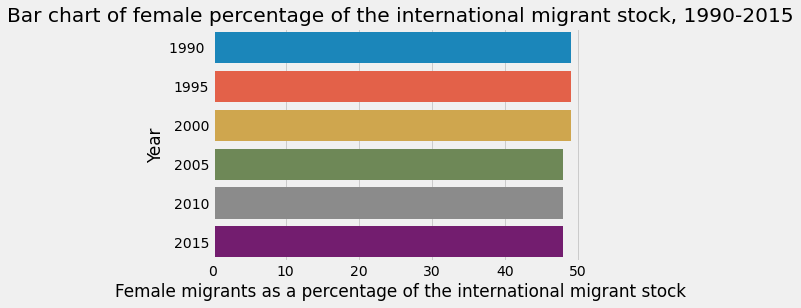

In [115]:
sns.barplot(x = "Female migrants as a percentage of the international migrant stock", y = "Year", ci=None, data = world_female_migrant_perc)
plots.title('Bar chart of female percentage of the international migrant stock, 1990-2015')
plots.show()

## 2. Barplot of Female migrants as a percentage of the international migrant stock,2015

In [116]:
## select columns
country_female_migrant_perc = UN_4[['Country or area of destination','Female migrants as a percentage of the international migrant stock','Year']]

In [117]:
country_female_migrant_perc

,Country or area of destination,Female migrants as a percentage of the international migrant stock,Year
0,Burundi,50.987061,1990
1,Comoros,52.290646,1990
2,Djibouti,47.437838,1990
3,Eritrea,47.434166,1990
4,Ethiopia,47.439047,1990
...,...,...,...
1387,Samoa,49.908704,2015
1388,Tokelau,52.156057,2015
1389,Tonga,45.437096,2015
1390,Tuvalu,44.680851,2015


In [118]:
country_female_migrant_perc['Female migrants as a percentage of the international migrant stock'].dtypes

dtype('O')

In [119]:
# Replace all '..' into 'No Value' for clarification
country_female_migrant_perc = country_female_migrant_perc.replace({'..':'0'})

In [120]:
country_female_migrant_perc['Female migrants as a percentage of the international migrant stock']=country_female_migrant_perc['Female migrants as a percentage of the international migrant stock'].astype(float).astype(int)

In [121]:
country_female_migrant_perc_2015 = country_female_migrant_perc.loc[country_female_migrant_perc["Year"] == "2015"]

In [122]:
top10_female_2015 = country_female_migrant_perc_2015.nlargest(10,'Female migrants as a percentage of the international migrant stock')

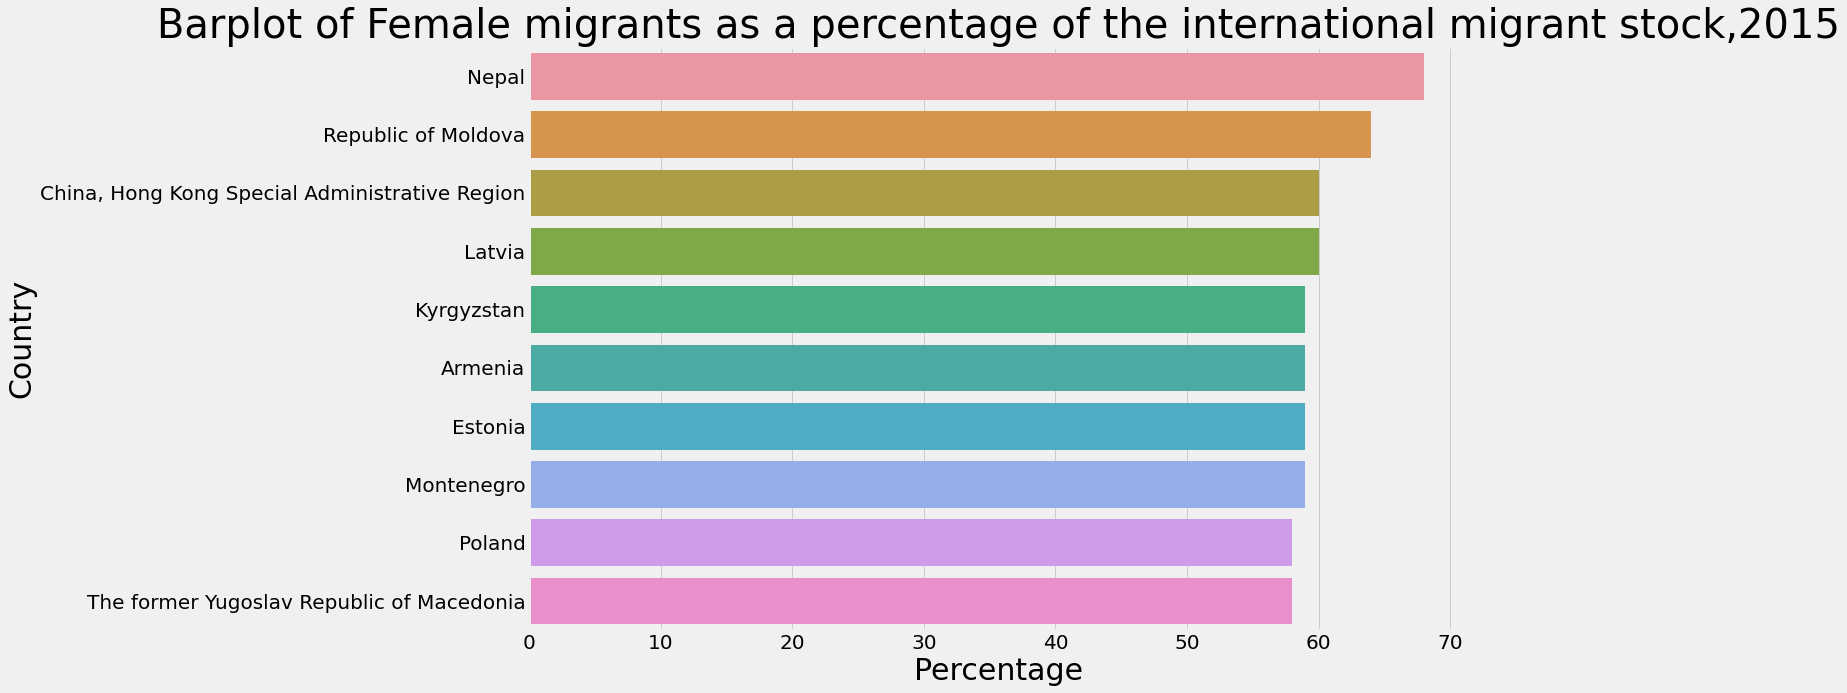

In [123]:
# top 10 countries hold the most numebr of international migrant stocks in 2015
fig,ax = plots.subplots(figsize=(15,10))
sns.barplot(x = "Female migrants as a percentage of the international migrant stock", y = "Country or area of destination", data = top10_female_2015)
plots.title('Barplot of Female migrants as a percentage of the international migrant stock,2015', fontsize=40)
plots.xlabel('Percentage', fontsize=30)
plots.ylabel('Country', fontsize=30)
plots.tick_params(axis='both', which='major', labelsize=20)
plots.show()

In [125]:
country_female_migrant_perc_2000 = country_female_migrant_perc.loc[country_female_migrant_perc["Year"] == "2000"]
top10_female_2000 = country_female_migrant_perc_2000.nlargest(10,'Female migrants as a percentage of the international migrant stock')

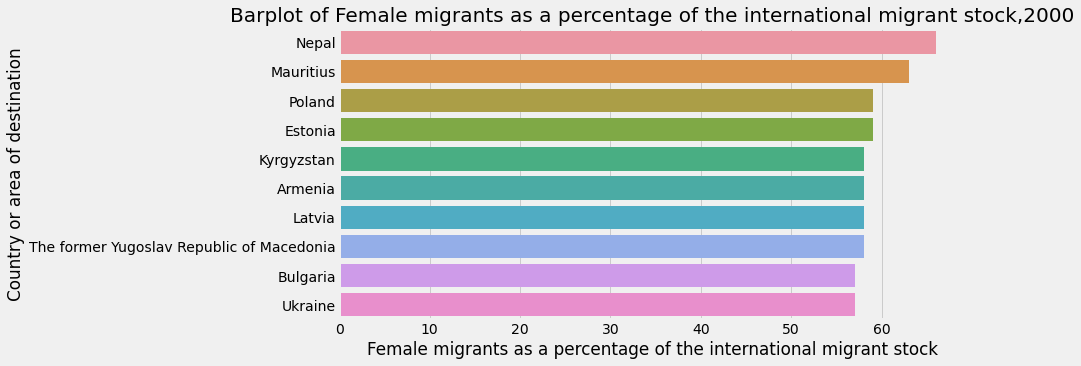

In [127]:
# top 10 countries hold the most numebr of international migrant stocks in 2000
fig,ax = plots.subplots(figsize=(10,5))
sns.barplot(x = "Female migrants as a percentage of the international migrant stock", y = "Country or area of destination", data = top10_female_2000)
plots.title('Barplot of Female migrants as a percentage of the international migrant stock,2000', fontsize=40)
plots.show()

In [128]:
## select columns we want to include for femalemigrant percentage
area_female_perc = UN_4_area[['Female migrants as a percentage of the international migrant stock',
                                         'Major area','Year']]

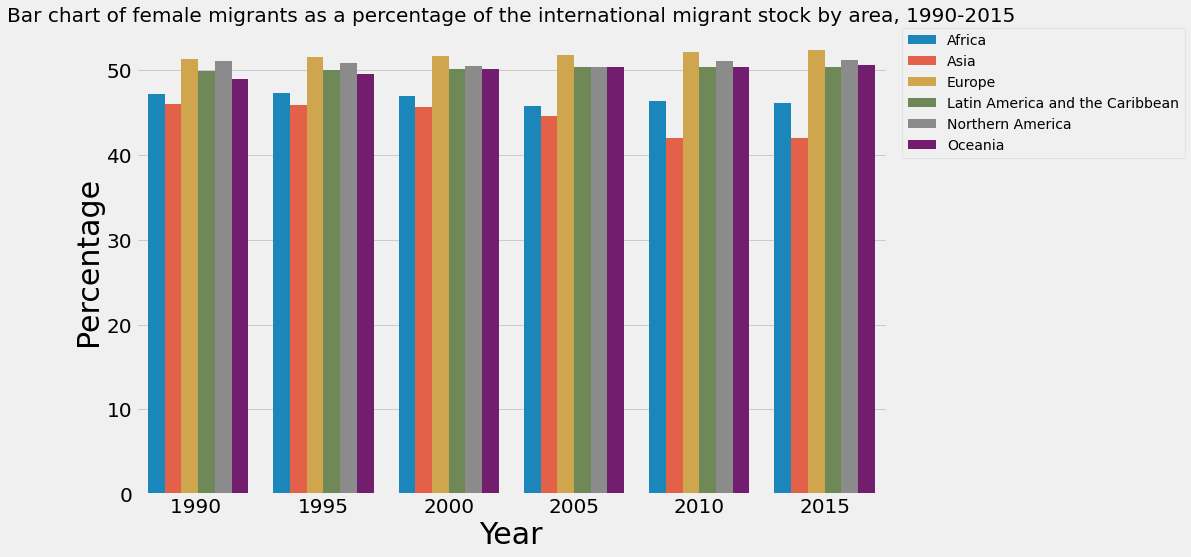

In [129]:
## plot the barplot
fig,ax = plots.subplots(figsize=(12,8))
sns.barplot(x = "Year", y = "Female migrants as a percentage of the international migrant stock", hue = "Major area", data = area_female_perc)
plots.title('Bar chart of female migrants as a percentage of the international migrant stock by area, 1990-2015',fontsize=20)
plots.xlabel('Year', fontsize=30)
plots.ylabel('Percentage', fontsize=30)
plots.tick_params(axis='both', which='major', labelsize=20)
plots.legend(bbox_to_anchor = (1.02,1), loc='upper left', borderaxespad=0)
plots.show()

# Table5

In [130]:
# Read the worksheet called Table 5: 
UN_5 = pd.read_excel(excel_workbook, sheet_name = "Table 5", header = 15, usecols = "A:T")
UN_5 = UN_5.rename(columns = {
    "Unnamed: 0": "Sort order",
    "Unnamed: 1": "Country or area of destination",
    "Unnamed: 2": "Notes",
    "Unnamed: 3": "Country code",
    "Unnamed: 4": "Type of data (a)",
    "1990-1995": "b1990-1995 ",
    "1995-2000": "b1995-2000",
    "2000-2005": "b2000-2005",
    "2005-2010": "b2005-2010",
    "2010-2015": "b2010-2015",
    "1990-1995.1": "m1990-1995",
    "1995-2000.1": "m1995-2000",
    "2000-2005.1": "m2000-2005",
    "2005-2010.1": "m2005-2010",
    "2010-2015.1": "m2010-2015",
    "1990-1995.2": "m2015-1995",
    "1995-2000.2": "f1990-2000",
    "2000-2005.2": "f1995-2005",
    "2005-2010.2": "f2000-2010",
    "2010-2015.2": "f2005-2015",
})

In [131]:
# This new formed table is the collection of all rows of regions and areas, further manipulations are needed.
UN_5_major_area_region = UN_5[UN_5['Type of data (a)'].isna()]
# separately select those rows into a new dataframe since data are grouped differently with others.
UN_5_world = UN_5_major_area_region.loc[0:6,:]
# Principle 1&2:
# Make this dataframe tidy and style the dataframe
UN_5_world = UN_5_world.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)"], 
               var_name = ["demographic"],
               value_name = "Annual rate of change of the migrant stock")
UN_5_world = UN_5_world.assign(Gender = lambda x:x.demographic.str[0].astype(str), 
                   Year = lambda x:x.demographic.str[1:].astype(str)).drop("demographic",axis = 1)
UN_5_world = UN_5_world.replace(to_replace =["b","m","f"],value =["Both","Male","Female"])


In [132]:
# Group rows of Area into a new dataframe
UN_5_area = UN_5_major_area_region[UN_5_major_area_region["Country code"].isin(ANNEX_area_code)]
# Principle 1&2
# Make this dataframe tidy
UN_5_area = UN_5_area.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)"], 
               var_name = ["demographic"],
               value_name = "Annual rate of change of the migrant stock")
UN_5_area = UN_5_area.assign(Gender = lambda x:x.demographic.str[0].astype(str), 
                   Year = lambda x:x.demographic.str[1:].astype(str)).drop("demographic",axis = 1)
UN_5_area = UN_5_area.replace(to_replace =["b","m","f"],value =["Both","Male","Female"])
UN_5_area = UN_5_area.rename(columns = {
    "Country or area of destination":"Major area"})

In [133]:
UN_5_area

,Sort order,Major area,Notes,Country code,Type of data (a),Annual rate of change of the migrant stock,Gender,Year
0,7,Africa,NaN,903,NaN,0.826734,Both,1990-1995
1,71,Asia,NaN,935,NaN,-0.673431,Both,1990-1995
2,127,Europe,NaN,908,NaN,1.420702,Both,1990-1995
3,180,Latin America and the Caribbean,NaN,904,NaN,-1.371210,Both,1990-1995
4,232,Northern America,NaN,905,NaN,3.771892,Both,1990-1995
...,...,...,...,...,...,...,...,...
85,71,Asia,NaN,935,NaN,2.583965,Female,2005-2015
86,127,Europe,NaN,908,NaN,1.121519,Female,2005-2015
87,180,Latin America and the Caribbean,NaN,904,NaN,2.288607,Female,2005-2015
88,232,Northern America,NaN,905,NaN,1.292130,Female,2005-2015


In [134]:
# Group rows of Region into a new dataframe
UN_5_region = UN_5_major_area_region.loc[~UN_1_major_area_region["Country code"].isin(ANNEX_area_code)].loc[7:,:]
# Principle 1&2
# Make this dataframe tidy and style the dataset
UN_5_region = UN_5_region.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)"], 
               var_name = ["demographic"],
               value_name = "Annual rate of change of the migrant stock")
UN_5_region = UN_5_region.assign(Gender = lambda x:x.demographic.str[0].astype(str), 
                   Year = lambda x:x.demographic.str[1:].astype(str)).drop("demographic",axis = 1)
UN_5_region=UN_5_region.replace(to_replace =["b","m","f"],value =["Both","Male","Female"])
UN_5_region = UN_5_region.rename(columns = {
    "Country or area of destination":"Region"})

In [135]:
# Filter out all country rows as the new UN_5 dataframe
UN_5 = UN_5[UN_5['Type of data (a)'].notna()]
# Left join two dataframes by their common column 'Sort order'
UN_5 = UN_5.join(ANNEX.set_index('Sort order'), on='Sort order')
# Principle 1&2
# Make this dataset tidy
UN_5 = UN_5.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)","Major area","Region"], 
               var_name = ["demographic"],
               value_name = "Annual rate of change of the migrant stock")
UN_5 = UN_5.assign(Gender = lambda x:x.demographic.str[0].astype(str), 
                   Year = lambda x:x.demographic.str[1:].astype(str)).drop("demographic",axis = 1)
# Styling the dataset
UN_5 = UN_5.replace(to_replace =["b","m","f"],value =["Both","Male","Female"])

In [136]:
UN_5

,Sort order,Country or area of destination,Notes,Country code,Type of data (a),Major area,Region,Annual rate of change of the migrant stock,Gender,Year
0,9,Burundi,NaN,108,B R,Africa,Eastern Africa,-5.355717,Both,1990-1995
1,10,Comoros,NaN,174,B,Africa,Eastern Africa,-0.199873,Both,1990-1995
2,11,Djibouti,NaN,262,B R,Africa,Eastern Africa,-4.058465,Both,1990-1995
3,12,Eritrea,NaN,232,I,Africa,Eastern Africa,0.910748,Both,1990-1995
4,13,Ethiopia,NaN,231,B R,Africa,Eastern Africa,-7.179771,Both,1990-1995
...,...,...,...,...,...,...,...,...,...,...
3475,261,Samoa,NaN,882,B,Oceania,Polynesia,-0.545343,Female,2005-2015
3476,262,Tokelau,NaN,772,B,Oceania,Polynesia,2.60325,Female,2005-2015
3477,263,Tonga,NaN,776,B,Oceania,Polynesia,2.526318,Female,2005-2015
3478,264,Tuvalu,NaN,798,C,Oceania,Polynesia,-1.819436,Female,2005-2015


# EDA-table5

## 1. annual rate of change of international migrants in major area, 1990-2015

In [137]:
## select rows
area_annual_perc= UN_5_area.loc[UN_5_area["Gender"] == "Both"]

In [138]:
## select columns we want to include for migrant percentage
area_annual_perc = area_annual_perc[['Annual rate of change of the migrant stock',
                                         'Major area','Year']]

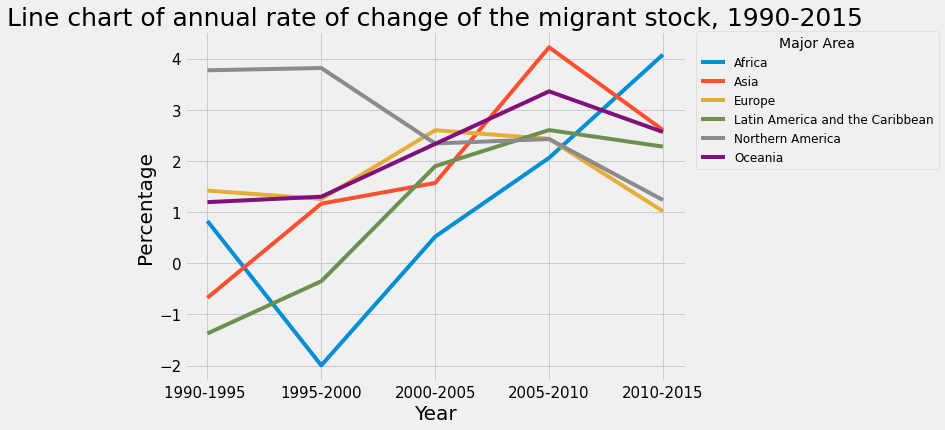

In [139]:
# line chart of migrants as a share of total populations by major area, 1990 to 2015
fig,ax = plots.subplots(figsize=(8,6))
perc = sns.lineplot(data = area_annual_perc, x = 'Year', y = 'Annual rate of change of the migrant stock', hue = 'Major area')
perc.set(xlabel='Year', ylabel='Annually change in Percentage')
plots.title('Line chart of annual rate of change of the migrant stock, 1990-2015', fontsize=25)
plots.xlabel('Year', fontsize=20)
plots.ylabel('Percentage', fontsize=20)
plots.tick_params(axis='both', which='major', labelsize=15)
plots.legend(bbox_to_anchor = (1.02,1), loc='upper left', borderaxespad=0, title = 'Major Area', fontsize=12)

## 2. Top 10 countries withe the largest annual change in 1990 and 2015

In [140]:
## select rows
country_annual = UN_5.loc[UN_5["Gender"] == "Both"]

In [141]:
## select columns we want to include for migrant percentage
country_annual_perc = country_annual[['Annual rate of change of the migrant stock',
                                         'Country or area of destination','Year']]

In [142]:
country_annual_perc['Annual rate of change of the migrant stock'].dtypes

dtype('O')

In [143]:
# Replace all '..' into '0' for clarification
country_annual_perc = country_annual_perc.replace({'..':'0'})

In [144]:
country_annual_perc

,Annual rate of change of the migrant stock,Country or area of destination,Year
0,-5.355717,Burundi,1990-1995
1,-0.199873,Comoros,1990-1995
2,-4.058465,Djibouti,1990-1995
3,0.910748,Eritrea,1990-1995
4,-7.179771,Ethiopia,1990-1995
...,...,...,...
1155,-0.768177,Samoa,2010-2015
1156,2.536144,Tokelau,2010-2015
1157,2.641235,Tonga,2010-2015
1158,-1.763854,Tuvalu,2010-2015


In [145]:
country_annual_perc['Annual rate of change of the migrant stock']=country_annual_perc['Annual rate of change of the migrant stock'].astype(float)

In [146]:
country_annual_perc_2015 = country_annual_perc.loc[country_annual_perc["Year"] == "2010-2015"]
top10_country_annual_2015 = country_annual_perc_2015.nlargest(10,'Annual rate of change of the migrant stock')

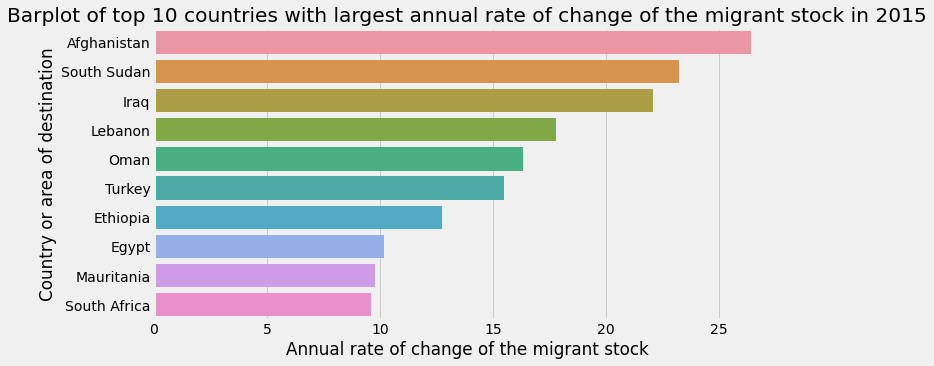

In [147]:
# top 10 countries hold the most numebr of international migrant stocks in 2015
fig,ax = plots.subplots(figsize=(10,5))
sns.barplot(x = "Annual rate of change of the migrant stock", y = "Country or area of destination", data = top10_country_annual_2015)
plots.title('Barplot of top 10 countries with largest annual rate of change of the migrant stock in 2015')
plots.show()

In [148]:
country_annual_perc_2010 = country_annual_perc.loc[country_annual_perc["Year"] == "2005-2010"]
top10_country_annual_2010 = country_annual_perc_2010.nlargest(10,'Annual rate of change of the migrant stock')

In [149]:
top10_country_annual_2010

,Annual rate of change of the migrant stock,Country or area of destination,Year
797,16.257842,Qatar,2005-2010
802,16.039760,United Arab Emirates,2005-2010
874,13.862944,Sint Maarten (Dutch part),2005-2010
800,12.797920,Syrian Arab Republic,2005-2010
765,12.766226,Republic of Korea,2005-2010
891,11.033680,Ecuador,2005-2010
803,10.266627,Yemen,2005-2010
924,10.169947,Tokelau,2005-2010
782,9.820748,Maldives,2005-2010
788,9.750533,Bahrain,2005-2010


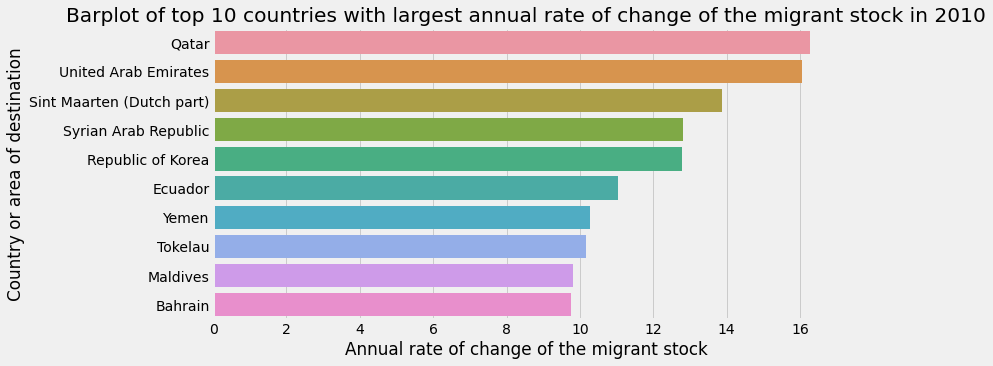

In [150]:
# top 10 countries hold the most numebr of international migrant stocks in 2015
fig,ax = plots.subplots(figsize=(10,5))
sns.barplot(x = "Annual rate of change of the migrant stock", y = "Country or area of destination", data = top10_country_annual_2010)
plots.title('Barplot of top 10 countries with largest annual rate of change of the migrant stock in 2010')
plots.show()

## 3. Annual rate of change in the world by gender, 1990-2015

In [151]:
# build bar chart to demonstrate total migrants in the world by sex in each year.
## select rows we want to include for 'WORLD'
world_migrant_annual = UN_5_world.loc[UN_5_world["Country or area of destination"] == "WORLD"]

In [152]:
world_migrant_annual

,Sort order,Country or area of destination,Notes,Country code,Type of data (a),Annual rate of change of the migrant stock,Gender,Year
0,1,WORLD,NaN,900,NaN,1.051865,Both,1990-1995
7,1,WORLD,NaN,900,NaN,1.428058,Both,1995-2000
14,1,WORLD,NaN,900,NaN,2.042124,Both,2000-2005
21,1,WORLD,NaN,900,NaN,2.954160,Both,2005-2010
28,1,WORLD,NaN,900,NaN,1.890991,Both,2010-2015
35,1,WORLD,NaN,900,NaN,1.000922,Male,1990-1995
42,1,WORLD,NaN,900,NaN,1.450294,Male,1995-2000
49,1,WORLD,NaN,900,NaN,2.151575,Male,2000-2005
56,1,WORLD,NaN,900,NaN,3.159228,Male,2005-2010
63,1,WORLD,NaN,900,NaN,1.912603,Male,2010-2015


In [153]:
## select columns we would like to use for bar chart
world_migrant_annual = world_migrant_annual[['Annual rate of change of the migrant stock','Gender','Year']]

In [154]:
world_migrant_annual

,Annual rate of change of the migrant stock,Gender,Year
0,1.051865,Both,1990-1995
7,1.428058,Both,1995-2000
14,2.042124,Both,2000-2005
21,2.954160,Both,2005-2010
28,1.890991,Both,2010-2015
35,1.000922,Male,1990-1995
42,1.450294,Male,1995-2000
49,2.151575,Male,2000-2005
56,3.159228,Male,2005-2010
63,1.912603,Male,2010-2015


In [188]:
## select rows we want to include for 'WORLD'
world_annual_develop = UN_5_world.loc[UN_5_world["Country or area of destination"].isin(['Developed regions','Developing regions'])]
world_annual_develop = world_annual_develop.loc[world_annual_develop["Gender"] == "Both"]

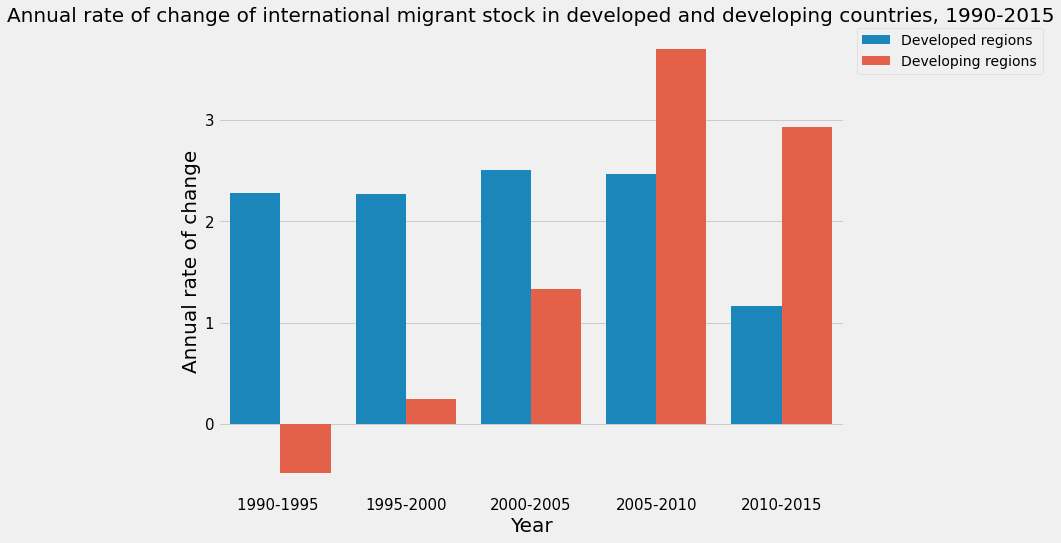

In [189]:
fig,ax = plots.subplots(figsize=(10,8))
sns.barplot(x = "Year", y = "Annual rate of change of the migrant stock", hue = "Country or area of destination", ci= None,data = world_annual_develop)
plots.title('Annual rate of change of international migrant stock in developed and developing countries, 1990-2015', fontsize=20)
plots.xlabel('Year', fontsize=20)
plots.ylabel('Annual rate of change', fontsize=20)
plots.tick_params(axis='both', which='major', labelsize=15)
plots.legend(bbox_to_anchor = (1.02,1), loc='upper left', borderaxespad=0)
plots.show()

# Table6

In [159]:
# Read the worksheet called Table 6: 
UN_6 = pd.read_excel(excel_workbook, sheet_name = "Table 6", header = 15, usecols = "A:V")
UN_6 = UN_6.rename(columns = {
    "Unnamed: 0": "Sort order",
    "Unnamed: 1": "Country or area of destination",
    "Unnamed: 2": "Notes",
    "Unnamed: 3": "Country code",
    "Unnamed: 4": "Type of data (a)",
})
# Replace all '..' into '0' for clarification
UN_6 = UN_6.replace({'..':0})

In [160]:
# This new formed table is the collection of all rows of regions and areas
UN_6_destination = UN_6[UN_6['Type of data (a)'].isna()]
# Create a table of data of the columns of Estimated refugee stock at mid-year
UN_6_destination_num = UN_6_destination[["Sort order","Country or area of destination","Notes","Country code","Type of data (a)",
                 1990,1995,2000,2005,2010,2015]]
# Principle 1&2
# make this dataset a tidy one
UN_6_destination_num = UN_6_destination_num.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)"], 
               var_name = ["Year"],
               value_name = "Estimated refugee stock at mid-year for both sexes")
# Create a table of data of the columns of Refugees as a percentage of the international migrant stock
UN_6_destination_perc = UN_6_destination[["Sort order","1990.1","1995.1","2000.1","2005.1","2010.1","2015.1"]].rename(columns = {
    "1990.1": "1990",
    "1995.1": "1995",
    "2000.1": "2000",
    "2005.1": "2005",
    "2010.1": "2010",
    "2015.1": "2015"
})
# Principle 1 & 2
# Make this dataset a tidy one
UN_6_destination_perc = UN_6_destination_perc.melt(id_vars = ["Sort order"], 
               var_name = ["Year"],
               value_name = "Refugees as a percentage of the international migrant stock")
UN_6_destination_perc = UN_6_destination_perc.iloc[:,[2]]
# Combine two dataframes together
# This is the first part of UN_6_destination, since I found the annual change of refugee stock should be another organizational unit.
# Therefore, here I deal with the violation of Principle 4.
df = [UN_6_destination_num, UN_6_destination_perc]
UN_6_destination_two = pd.concat(df, axis = 1)
UN_6_destination_two = UN_6_destination_two.rename(columns = {
    "Country or area of destination":"Area or destination"})
UN_6_destination_two

,Sort order,Area or destination,Notes,Country code,Type of data (a),Year,Estimated refugee stock at mid-year for both sexes,Refugees as a percentage of the international migrant stock
0,1,WORLD,NaN,900,NaN,1990,18836571,12.346732
1,2,Developed regions,(b),901,NaN,1990,2014564,2.445494
2,3,Developing regions,(c),902,NaN,1990,16822007,23.968236
3,4,Least developed countries,(d),941,NaN,1990,5048391,45.565880
4,5,Less developed regions excluding least develop...,NaN,934,NaN,1990,11773616,19.919743
...,...,...,...,...,...,...,...,...
193,238,Oceania,NaN,909,NaN,2015,54610,0.674124
194,239,Australia and New Zealand,NaN,927,NaN,2015,49408,0.633160
195,242,Melanesia,NaN,928,NaN,2015,4812,4.390711
196,248,Micronesia,NaN,954,NaN,2015,390,0.336869


In [161]:
# Create a table of data of the columns of Refugees as a percentage of the international migrant stock
UN_6_destination_annual = UN_6_destination[["Sort order","Country or area of destination","Notes","Country code","Type of data (a)",
                    '1990-1995',
                    '1995-2000',
                    '2000-2005',
                    '2005-2010',
                    '2010-2015']]
# Principle 1&2
# This is the second part of UN_6_destination
UN_6_destination_annual = UN_6_destination_annual.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)"], 
               var_name = ["Year"],
               value_name = "Annual rate of change of the refugee stock")
UN_6_destination_annual = UN_6_destination_annual.rename(columns = {
    "Country or area of destination":"Area or destination"})
UN_6_destination_annual

,Sort order,Area or destination,Notes,Country code,Type of data (a),Year,Annual rate of change of the refugee stock
0,1,WORLD,NaN,900,NaN,1990-1995,-2.123497
1,2,Developed regions,(b),901,NaN,1990-1995,9.388424
2,3,Developing regions,(c),902,NaN,1990-1995,-2.839417
3,4,Least developed countries,(d),941,NaN,1990-1995,-0.680327
4,5,Less developed regions excluding least develop...,NaN,934,NaN,1990-1995,-4.383600
...,...,...,...,...,...,...,...
160,238,Oceania,NaN,909,NaN,2010-2015,7.804057
161,239,Australia and New Zealand,NaN,927,NaN,2010-2015,8.829439
162,242,Melanesia,NaN,928,NaN,2010-2015,-0.268521
163,248,Micronesia,NaN,954,NaN,2010-2015,0.000000


In [162]:
# Perform similar process I did before on rows of countries
# Filter out all country rows as the new UN_6 dataframe
UN_6 = UN_6[UN_6['Type of data (a)'].notna()]
# Left join two dataframes by their common column 'Sort order' to append two new columns
UN_6 = UN_6.join(ANNEX.set_index('Sort order'), on='Sort order')
# Create a table of data of the columns of Estimated refugee stock at mid-year
UN_6_num = UN_6[["Sort order","Country or area of destination","Notes","Country code","Type of data (a)","Major area","Region",
                 1990,1995,2000,2005,2010,2015]]
# Principle 1&2
# Make this dataset a tidy one
UN_6_num = UN_6_num.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)","Major area","Region"], 
               var_name = ["Year"],
               value_name = "Estimated refugee stock at mid-year for both sexes")
# Create a table of data of the columns of Refugees as a percentage of the international migrant stock
UN_6_perc = UN_6[["Sort order","1990.1","1995.1","2000.1","2005.1","2010.1","2015.1"]].rename(columns = {
    "1990.1": "1990",
    "1995.1": "1995",
    "2000.1": "2000",
    "2005.1": "2005",
    "2010.1": "2010",
    "2015.1": "2015"
})
# Principle 1&2
# Make this dataset a tidy one
UN_6_perc = UN_6_perc.melt(id_vars = ["Sort order"], 
               var_name = ["Year"],
               value_name = "Refugees as a percentage of the international migrant stock")
UN_6_perc = UN_6_perc.iloc[:,[2]]
# Combine two dataframes together
# This is the first part of UN_6
df = [UN_6_num, UN_6_perc]
UN_6_two = pd.concat(df, axis = 1)
UN_6_two = UN_6_two.rename(columns = {
    "Country or area of destination":"Country"})
UN_6_two

,Sort order,Country,Notes,Country code,Type of data (a),Major area,Region,Year,Estimated refugee stock at mid-year for both sexes,Refugees as a percentage of the international migrant stock
0,9,Burundi,NaN,108,B R,Africa,Eastern Africa,1990,267929,80.432590
1,10,Comoros,NaN,174,B,Africa,Eastern Africa,1990,0,0.000000
2,11,Djibouti,NaN,262,B R,Africa,Eastern Africa,1990,54508,44.597901
3,12,Eritrea,NaN,232,I,Africa,Eastern Africa,1990,0,0.000000
4,13,Ethiopia,NaN,231,B R,Africa,Eastern Africa,1990,741965,64.217710
...,...,...,...,...,...,...,...,...,...,...
1387,261,Samoa,NaN,882,B,Oceania,Polynesia,2015,0,0.000000
1388,262,Tokelau,NaN,772,B,Oceania,Polynesia,2015,0,0.000000
1389,263,Tonga,NaN,776,B,Oceania,Polynesia,2015,0,0.000000
1390,264,Tuvalu,NaN,798,C,Oceania,Polynesia,2015,0,0.000000


In [163]:
UN_6_annual = UN_6[["Sort order","Country or area of destination","Notes","Country code","Type of data (a)","Major area","Region",
                    '1990-1995',
                    '1995-2000',
                    '2000-2005',
                    '2005-2010',
                    '2010-2015']]
# Principle 1&2
# Make this dataset a tidy one
UN_6_annual = UN_6_annual.melt(id_vars = ["Sort order","Country or area of destination","Notes","Country code","Type of data (a)","Major area","Region"], 
               var_name = ["Year"],
               value_name = "Annual rate of change of the refugee stock")
UN_6_annual = UN_6_annual.rename(columns = {
    "Country or area of destination":"Country"})
UN_6_annual

,Sort order,Country,Notes,Country code,Type of data (a),Major area,Region,Year,Annual rate of change of the refugee stock
0,9,Burundi,NaN,108,B R,Africa,Eastern Africa,1990-1995,-3.390926
1,10,Comoros,NaN,174,B,Africa,Eastern Africa,1990-1995,0.000000
2,11,Djibouti,NaN,262,B R,Africa,Eastern Africa,1990-1995,-9.763426
3,12,Eritrea,NaN,232,I,Africa,Eastern Africa,1990-1995,0.000000
4,13,Ethiopia,NaN,231,B R,Africa,Eastern Africa,1990-1995,-5.505717
...,...,...,...,...,...,...,...,...,...
1155,261,Samoa,NaN,882,B,Oceania,Polynesia,2010-2015,0.000000
1156,262,Tokelau,NaN,772,B,Oceania,Polynesia,2010-2015,0.000000
1157,263,Tonga,NaN,776,B,Oceania,Polynesia,2010-2015,0.000000
1158,264,Tuvalu,NaN,798,C,Oceania,Polynesia,2010-2015,0.000000


# EDA-table6

## 1. line chart of world refugee annual change from 1990 to 2015

In [164]:
# build bar chart to demonstrate total migrants in the world by sex in each year.
## select rows we want to include for 'WORLD'
world_refugee_annual = UN_6_destination_annual.loc[UN_6_destination_annual["Area or destination"] == "WORLD"]

Text(0.5, 1.0, 'Annual rate of change of the refugee stock, 1990-2015')

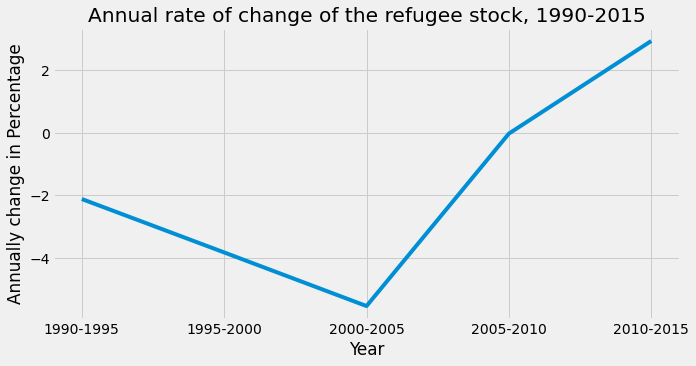

In [165]:
# line chart of migrants as a share of total populations by major area, 1990 to 2015
fig,ax = plots.subplots(figsize=(10,5))
perc = sns.lineplot(data = world_refugee_annual, x = 'Year', y = 'Annual rate of change of the refugee stock')
perc.set(xlabel='Year', ylabel='Annually change in Percentage')
plots.title('Annual rate of change of the refugee stock, 1990-2015')

## 2. barplot for the percentage of refugees in the international migrant stock

In [171]:
world_refugee = UN_6_destination_two.loc[UN_6_destination_two["Area or destination"] == "WORLD"]

In [169]:
# select "Refugees as a percentage of the international migrant stock" and any other columns needed.
world_refugee_perc = world_refugee[['Refugees as a percentage of the international migrant stock','Year']]

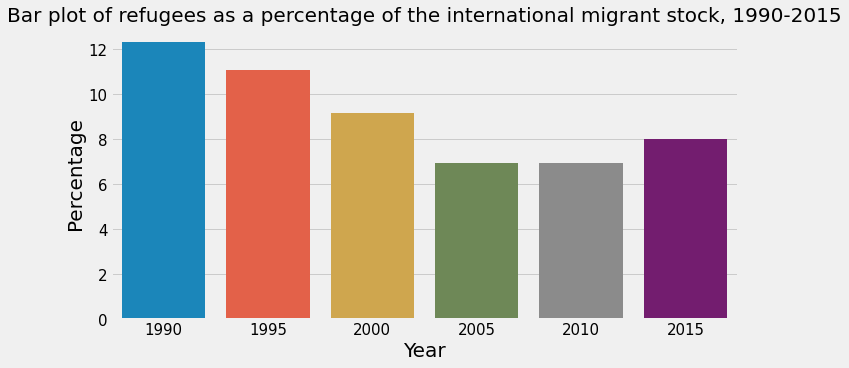

In [174]:
# plot the barplot of refugees share
fig,ax = plots.subplots(figsize=(10,5))
sns.barplot(x = "Year", y = "Refugees as a percentage of the international migrant stock", data = world_refugee_perc)
plots.title('Bar plot of refugees as a percentage of the international migrant stock, 1990-2015', fontsize=20)
plots.xlabel('Year', fontsize=20)
plots.ylabel('Percentage', fontsize=20)
plots.tick_params(axis='both', which='major', labelsize=15)
plots.show()

## 3. barplot of top 10 countries with the largest annual rate of change of refugee 2010-2015

In [175]:
## select columns we want to include for refuge percentage
country_refugee_annual = UN_6_annual[['Annual rate of change of the refugee stock',
                                         'Country','Year']]

In [176]:
country_refugee_annual

,Annual rate of change of the refugee stock,Country,Year
0,-3.390926,Burundi,1990-1995
1,0.000000,Comoros,1990-1995
2,-9.763426,Djibouti,1990-1995
3,0.000000,Eritrea,1990-1995
4,-5.505717,Ethiopia,1990-1995
...,...,...,...
1155,0.000000,Samoa,2010-2015
1156,0.000000,Tokelau,2010-2015
1157,0.000000,Tonga,2010-2015
1158,0.000000,Tuvalu,2010-2015


In [177]:
country_refugee_annual_2015 = country_refugee_annual.loc[country_refugee_annual["Year"] == "2010-2015"]
top10_refugee_annual_2015 = country_refugee_annual_2015.nlargest(10,'Annual rate of change of the refugee stock')

In [178]:
top10_refugee_annual_2015

,Annual rate of change of the refugee stock,Country,Year
980,97.349493,Niger,2010-2015
1033,85.797022,Turkey,2010-2015
1059,85.683090,Albania,2010-2015
970,81.015214,Burkina Faso,2010-2015
1043,76.595389,Russian Federation,2010-2015
1139,50.708582,Fiji,2010-2015
1009,50.501739,Afghanistan,2010-2015
1064,39.735953,Greece,2010-2015
962,36.752270,Tunisia,2010-2015
1091,36.112280,Cayman Islands,2010-2015


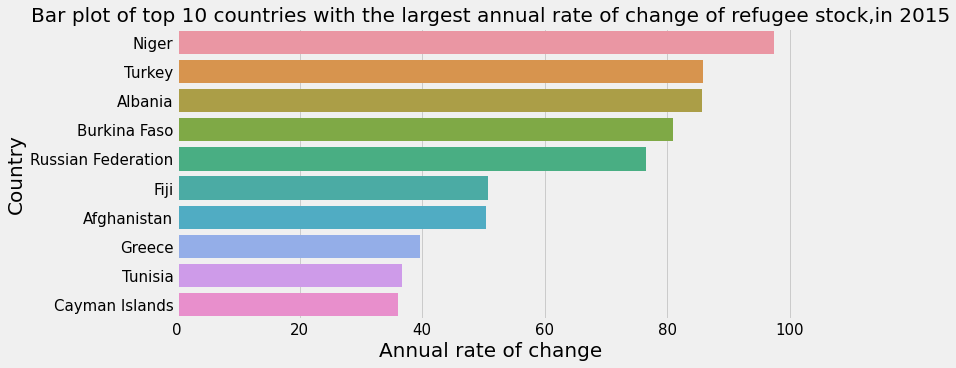

In [179]:
fig,ax = plots.subplots(figsize=(10,5))
sns.barplot(x = "Annual rate of change of the refugee stock", y = "Country", data = top10_refugee_annual_2015)
plots.title('Bar plot of top 10 countries with the largest annual rate of change of refugee stock,in 2015', fontsize=20)
plots.xlabel('Annual rate of change', fontsize=20)
plots.ylabel('Country', fontsize=20)
plots.tick_params(axis='both', which='major', labelsize=15)
plots.show()

## 4. barplot of top 10 countries with the largest share of refugee in migrant in 2015

In [180]:
UN_6_two

,Sort order,Country,Notes,Country code,Type of data (a),Major area,Region,Year,Estimated refugee stock at mid-year for both sexes,Refugees as a percentage of the international migrant stock
0,9,Burundi,NaN,108,B R,Africa,Eastern Africa,1990,267929,80.432590
1,10,Comoros,NaN,174,B,Africa,Eastern Africa,1990,0,0.000000
2,11,Djibouti,NaN,262,B R,Africa,Eastern Africa,1990,54508,44.597901
3,12,Eritrea,NaN,232,I,Africa,Eastern Africa,1990,0,0.000000
4,13,Ethiopia,NaN,231,B R,Africa,Eastern Africa,1990,741965,64.217710
...,...,...,...,...,...,...,...,...,...,...
1387,261,Samoa,NaN,882,B,Oceania,Polynesia,2015,0,0.000000
1388,262,Tokelau,NaN,772,B,Oceania,Polynesia,2015,0,0.000000
1389,263,Tonga,NaN,776,B,Oceania,Polynesia,2015,0,0.000000
1390,264,Tuvalu,NaN,798,C,Oceania,Polynesia,2015,0,0.000000


In [181]:
# select columns we want to include for refuge percentage
country_refugee_perc = UN_6_two[['Refugees as a percentage of the international migrant stock',
                                         'Country','Year']]

In [182]:
country_refugee_perc

,Refugees as a percentage of the international migrant stock,Country,Year
0,80.432590,Burundi,1990
1,0.000000,Comoros,1990
2,44.597901,Djibouti,1990
3,0.000000,Eritrea,1990
4,64.217710,Ethiopia,1990
...,...,...,...
1387,0.000000,Samoa,2015
1388,0.000000,Tokelau,2015
1389,0.000000,Tonga,2015
1390,0.000000,Tuvalu,2015


In [183]:
country_refugee_perc_2015 = country_refugee_perc.loc[country_refugee_perc["Year"] == 2015]

In [184]:
top10_refugee_perc_2015 = country_refugee_perc_2015.nlargest(10,'Refugees as a percentage of the international migrant stock')

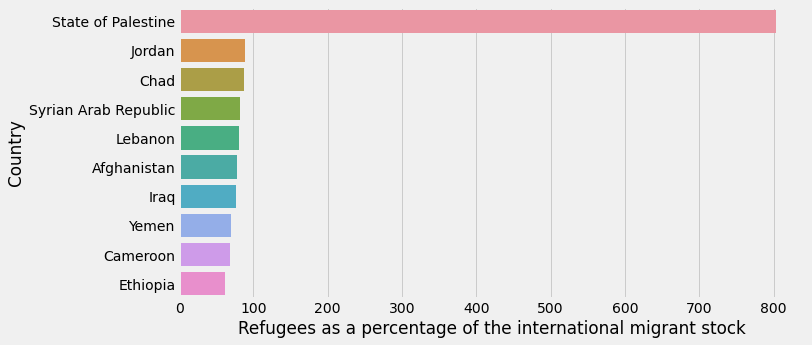

In [185]:
fig,ax = plots.subplots(figsize=(10,5))
sns.barplot(x = "Refugees as a percentage of the international migrant stock", y = "Country", data = top10_refugee_perc_2015)
plots.show()